In [4]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud


In [5]:
# Download NLTK data files
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sutri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sutri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sutri\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
# Define the path to your JSON file
json_file_path = r'C:\Users\sutri\iCloudDrive\3L68KQB4HG~com~readdle~CommonDocuments\Ontario Tech\Fall 2024\45548 - Progarmming and Data processing\Final Project\Election Tweets.json'

# Load the JSON data
with open(json_file_path, 'r', encoding='utf-8') as file:
    tweets_data = json.load(file)

# Convert to pandas DataFrame
df = pd.json_normalize(tweets_data)

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
                       created_at                   id               id_str  \
0  Wed Sep 11 18:38:30 +0000 2019  1171855551531225089  1171855551531225089   
1  Wed Sep 11 11:51:52 +0000 2019  1171753219116191744  1171753219116191744   
2  Wed Sep 11 14:46:19 +0000 2019  1171797123605651458  1171797123605651458   
3  Wed Sep 11 19:10:27 +0000 2019  1171863594746687488  1171863594746687488   
4  Wed Sep 11 02:46:33 +0000 2019  1171615987692711936  1171615987692711936   

                                           full_text truncated  \
0  @CTVNews I wonder why.  No.  Wait.  I don’t. #...     False   
1  We have been warning Canadians about the threa...     False   
2  @DiCintio You will be sleeping forever! #VOTE ...     False   
3  So if #SNCLavalin never existed at all what wo...     False   
4  RT @Wolfer_dot_ca: Immigrant Diversity Killed ...     False   

  display_text_range                                             source  \
0            [9, 67]  <a

In [7]:
#Handling Missing Values
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Depending on the columns, decide how to handle missing values
# For example, drop rows where 'text' is missing
df = df.dropna(subset=['full_text'])

df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

# For other columns, you might fill missing values or drop them
#df = df.fillna({'column_name': 'default_value'})  # Example



Missing values in each column:
created_at                                                        151
id                                                                  0
id_str                                                            151
full_text                                                         151
truncated                                                         151
                                                                 ... 
retweeted_status.quoted_status.place.country_code                4965
retweeted_status.quoted_status.place.country                     4965
retweeted_status.quoted_status.place.contained_within            4965
retweeted_status.quoted_status.place.bounding_box.type           4965
retweeted_status.quoted_status.place.bounding_box.coordinates    4965
Length: 357, dtype: int64


C:\Users\sutri\AppData\Local\Temp\ipykernel_33492\3516274566.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4815 entries, 0 to 4965
Columns: 357 entries, created_at to retweeted_status.quoted_status.place.bounding_box.coordinates
dtypes: datetime64[ns, UTC](1), float64(87), int64(1), object(268)
memory usage: 13.2+ MB


In [9]:
df.shape

(4815, 357)

In [10]:
df.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       ...
       'retweeted_status.quoted_status.place.id',
       'retweeted_status.quoted_status.place.url',
       'retweeted_status.quoted_status.place.place_type',
       'retweeted_status.quoted_status.place.name',
       'retweeted_status.quoted_status.place.full_name',
       'retweeted_status.quoted_status.place.country_code',
       'retweeted_status.quoted_status.place.country',
       'retweeted_status.quoted_status.place.contained_within',
       'retweeted_status.quoted_status.place.bounding_box.type',
       'retweeted_status.quoted_status.place.bounding_box.coordinates'],
      dtype='object', length=357)

In [11]:
# summary of the dataset
dataset_summary = df.describe(include='all')

# Extract column names
columns_info = pd.DataFrame(df.columns, columns=["Column Names"])

# Display summary statistics
print("Summary Statistics of the Dataset:")
print(dataset_summary)

# Display column names
print("\nList of Column Names:")
print(columns_info)

Summary Statistics of the Dataset:
                                 created_at            id  \
count                                  4815  4.815000e+03   
unique                                  NaN           NaN   
top                                     NaN           NaN   
freq                                    NaN           NaN   
mean    2019-09-20 14:59:11.653997824+00:00  1.175062e+18   
min               2019-09-11 00:14:50+00:00  1.171578e+18   
25%        2019-09-14 22:05:53.500000+00:00  1.172995e+18   
50%               2019-09-19 20:30:28+00:00  1.174783e+18   
75%               2019-09-25 17:51:48+00:00  1.176917e+18   
max               2019-10-02 02:14:55+00:00  1.179218e+18   
std                                     NaN  2.201978e+15   

                     id_str  \
count                  4815   
unique                 4815   
top     1171855551531225089   
freq                      1   
mean                    NaN   
min                     NaN   
25%            

In [12]:
# checking verified/unverfieid users
df['user_type'] = df['user.verified'].apply(lambda x: 'Verified' if x else 'Unverified')
# Display the count of verified vs unverified users
print(df['user_type'].value_counts())


user_type
Unverified    4514
Verified       301
Name: count, dtype: int64


In [21]:
## checking verified and unverified users
print(df[['user.verified', 'user_type']].head(10))

  user.verified   user_type
0         False  Unverified
1          True    Verified
2         False  Unverified
3         False  Unverified
4         False  Unverified
5         False  Unverified
6         False  Unverified
7         False  Unverified
8         False  Unverified
9          True    Verified


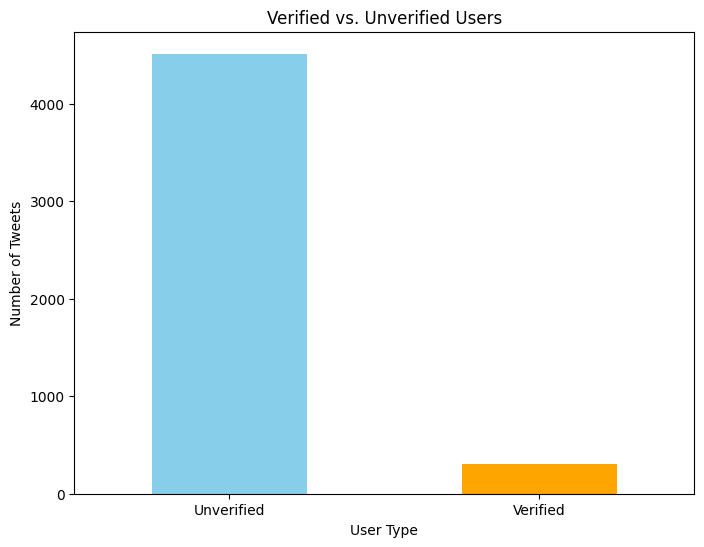

In [22]:
## checking verified and unverified users in bar chart
import matplotlib.pyplot as plt

# Plot the distribution of verified and unverified users
user_type_counts = df['user_type'].value_counts()
user_type_counts.plot(kind='bar', color=['skyblue', 'orange'], figsize=(8, 6))
plt.title('Verified vs. Unverified Users')
plt.xlabel('User Type')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()


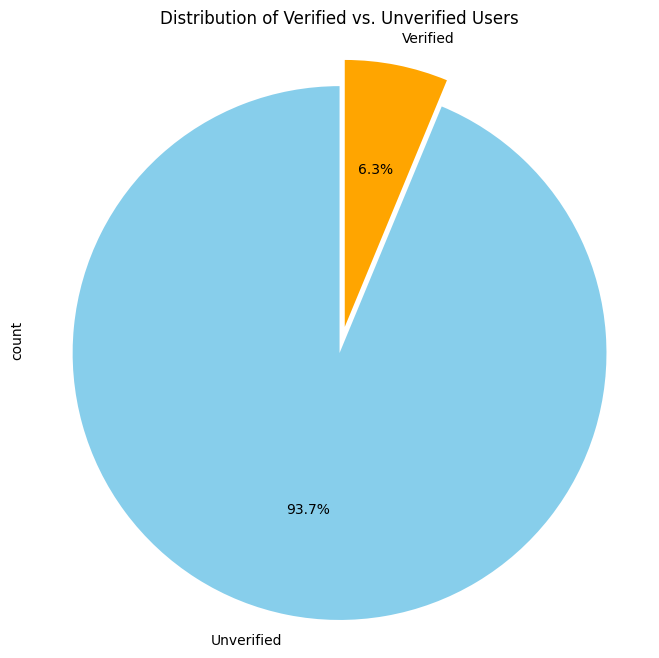

In [15]:
# Plot the distribution of verified and unverified users as a pie chart
user_type_counts = df['user_type'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
user_type_counts.plot(
    kind='pie',
    autopct='%1.1f%%',  # Show percentages with 1 decimal place
    colors=['skyblue', 'orange'],  # Colors for the pie chart
    startangle=90,  # Start angle for better visual alignment
    explode=(0.1, 0)  # Slightly explode the "Verified" slice for emphasis
)

# Add chart title
plt.title('Distribution of Verified vs. Unverified Users')

# Equal aspect ratio to ensure pie chart looks circular
plt.axis('equal')
plt.show()


user_type
Unverified    41.105007
Verified      56.385382
Name: reactions, dtype: float64


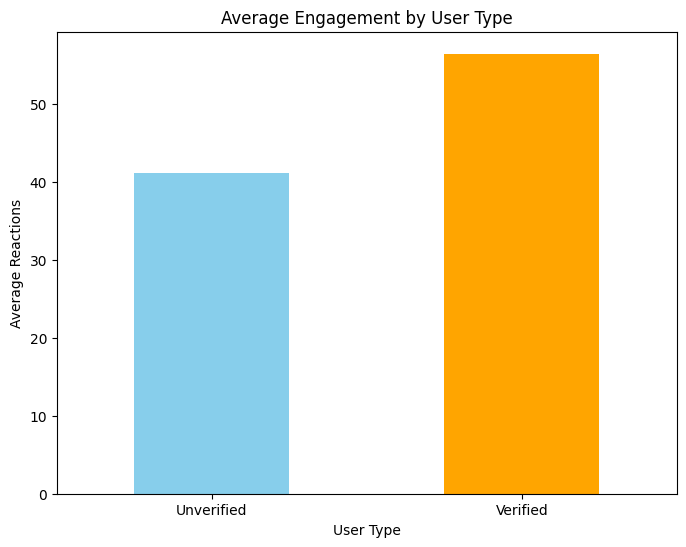

In [23]:
# 'reactions' count calculating
df['reactions'] = df['retweet_count'] + df['favorite_count']

# Calculate average reactions by user type
engagement_by_user_type = df.groupby('user_type')['reactions'].mean()

# Display the engagement comparison
print(engagement_by_user_type)

# Plot engagement by user type
engagement_by_user_type.plot(kind='bar', color=['skyblue', 'orange'], figsize=(8, 6))
plt.title('Average Engagement by User Type')
plt.xlabel('User Type')
plt.ylabel('Average Reactions')
plt.xticks(rotation=0)
plt.show()


In [24]:
# Filter for bot accounts / whether Bots are verified
## this is becasue sometime news and media could use bot accounts to publish news/tweets
bot_accounts = df[df['actor_type'] == 'Bot']

# Check if any bot accounts are verified
verified_bots = bot_accounts[bot_accounts['user.verified'] == True]

# Display the results
if not verified_bots.empty:
    print(f"Number of verified accounts classified as bots: {len(verified_bots)}")
    print("\nDetails of verified bot accounts:")
    print(verified_bots[['user.screen_name', 'user.description', 'reactions', 'user.statuses_count', 'user.followers_count']].head())
else:
    print("No verified accounts classified as bots.")


No verified accounts classified as bots.


In [25]:
## this is to check the reactiosn that received by BOT accounts with highest

# classify bot accounts
def classify_actor(row):
    description = str(row['user.description']).lower()
    statuses_count = row['user.statuses_count']
    followers_count = row['user.followers_count']
    following_count = row['user.friends_count']

    # Rule-based classification
    if statuses_count > 5000 and followers_count < 100:
        return 'Bot'  # High activity, low followers
    elif 'campaign' in description or 'organization' in description:
        return 'Organization/Group'
    elif followers_count > 100 and statuses_count < 5000:
        return 'Citizen'
    else:
        return 'Other/Unknown'

# Function classification for actors
df['actor_type'] = df.apply(classify_actor, axis=1)

# Filter for bot accounts
bot_tweets = df[df['actor_type'] == 'Bot']

# Group by bot user and calculate total reactions
top_bot_accounts = (
    bot_tweets.groupby('user.screen_name')
    .agg({'reactions': 'sum', 'user.screen_name': 'count'})
    .rename(columns={'user.screen_name': 'Tweet Count'})
    .sort_values(by='reactions', ascending=False)
    .reset_index()
)

# Rename columns for clarity
top_bot_accounts.columns = ['User', 'Total Reactions', 'Total Tweets']

# Display the top 5 bot accounts with the most reactions
print("Top 5 Bot Accounts with the Most Reactions:")
print(top_bot_accounts.head(5))


Top 5 Bot Accounts with the Most Reactions:
            User  Total Reactions  Total Tweets
0  wickens_garth            352.0             2
1    GrimJoke888            352.0             2
2    free2readca            290.0             2
3   aquastranger            288.0             2
4    LeahMochula            280.0             1


In [26]:
## post that got the most reactions
# Add a new column for total reactions
df['reactions'] = df['retweet_count'] + df['favorite_count']

# Sort by total reactions and get the top 10 posts
top_posts = df.sort_values(by='reactions', ascending=False).head(10)

# Display the top 10 posts with reactions, retweets, and likes
print("\nTop 10 Posts with the Most Reactions:")
print(top_posts[['full_text', 'reactions', 'retweet_count', 'favorite_count']])



Top 10 Posts with the Most Reactions:
                                              full_text  reactions  \
1032  RT @JPTasker: New from me — Immigration lawyer...     3277.0   
2567  Father just called to say we are to vote for J...     3021.0   
438   Andrew Scheer just said refugees are "jumping ...     2864.0   
2370  Remember when @JustinTrudeau told a heckler he...     1745.0   
4039  TRUDEAU flew in 60,000 Syrian Islamists - hous...     1603.0   
2328  4. Immigration policies that keep especially L...     1577.0   
2354  If you're a white person feigning concern abou...     1548.0   
4204  CBC reports some people (I wonder who) have co...     1309.0   
2329  Those structures continue to exist and margina...     1276.0   
3720  Is it true, if the CPC wins the election (beca...     1193.0   

      retweet_count  favorite_count  
1032         3277.0             0.0  
2567          504.0          2517.0  
438          1069.0          1795.0  
2370          652.0          1093.0  


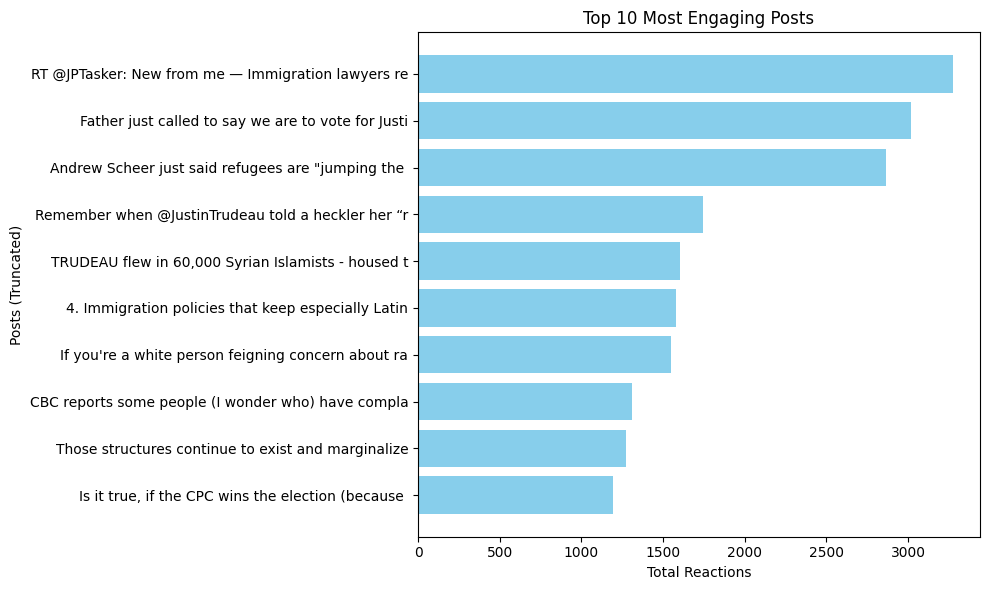

In [27]:
# Plot engagement of the top 10 posts
plt.figure(figsize=(10, 6))
plt.barh(top_posts['full_text'].str[:50], top_posts['reactions'], color='skyblue')
plt.xlabel('Total Reactions')
plt.ylabel('Posts (Truncated)')
plt.title('Top 10 Most Engaging Posts')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Above Codes are verifying basic data set without cleaning dataset

Let's pre-process the dataset and compare

In [28]:
#Text Cleaning
import re

# Text Cleaning Function
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags (but keep the hashtag text)
    text = re.sub(r'#', '', text)
    # Decode HTML entities (e.g., &amp; -> &)
    text = re.sub(r'\bamp\b', '', text)
    # Remove emojis and other non-ASCII characters
    text = text.encode('ascii', 'ignore').decode('ascii')
    # Remove special characters, punctuation, and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Convert to lowercase
    text = text.lower()
    # Remove "rt" (retweet marker)
    text = re.sub(r'\brt\b', '', text)
    return text

# Apply the cleaning function
df['clean_text'] = df['full_text'].apply(clean_text)

# Filter to exclude bots
df_no_bots = df[df['actor_type'] != 'Bot']

# Display cleaned text from the non-bot dataset
print("\nCleaned text sample (without bots):")
print(df_no_bots['clean_text'].head())




Cleaned text sample (without bots):
0      i wonder why no wait i dont immigration cdnpoli
1    we have been warning canadians about the threa...
2    you will be sleeping forever vote liberals for...
3    so if snclavalin never existed at all what wou...
4     immigrant diversity killed canadian history h...
Name: clean_text, dtype: object


In [29]:
# Drop rows where 'full_text' is missing (important for clean_text function)
df = df.dropna(subset=['full_text'])

# Drop columns with too many missing values (e.g., >90% missing)
threshold = 0.9
df = df.loc[:, df.isnull().mean() < threshold]

# Fill missing values in other important columns (example: created_at)
df['created_at'] = df['created_at'].fillna("Unknown")  # Replace with 'Unknown' or another strategy

# Apply text cleaning function
df['clean_text'] = df['full_text'].apply(clean_text)

# Filter to exclude bots
df_no_bots = df[df['actor_type'] != 'Bot']

# Display cleaned text sample
print("\nCleaned text sample (without bots):")
print(df_no_bots['clean_text'].head())



Cleaned text sample (without bots):
0      i wonder why no wait i dont immigration cdnpoli
1    we have been warning canadians about the threa...
2    you will be sleeping forever vote liberals for...
3    so if snclavalin never existed at all what wou...
4     immigrant diversity killed canadian history h...
Name: clean_text, dtype: object


In [33]:
# Removing Stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = text.split()
    filtered = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered)

df_no_bots['clean_text'] = df_no_bots['clean_text'].apply(remove_stopwords)

print("\nText after removing stopwords:")
print(df_no_bots['clean_text'].head())



Text after removing stopwords:
0                 wonder wait dont immigration cdnpoli
1    warning canadians threat open borders unglobal...
2    sleeping forever vote liberals forallpeople di...
3    snclavalin never existed would andrewscheer ta...
4    immigrant diversity killed canadian history hi...
Name: clean_text, dtype: object


C:\Users\sutri\AppData\Local\Temp\ipykernel_33492\3813572212.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_bots['clean_text'] = df_no_bots['clean_text'].apply(remove_stopwords)


In [32]:
print(df_no_bots.columns)

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       ...
       'retweeted_status.favorited', 'retweeted_status.retweeted',
       'retweeted_status.possibly_sensitive', 'retweeted_status.lang',
       'entities.media', 'extended_entities.media', 'user_type', 'reactions',
       'actor_type', 'clean_text'],
      dtype='object', length=179)


In [34]:
# Basic Statistics
print("\nDataset Information:")
print(df_no_bots.info())

print("\nStatistical Summary:")
print(df_no_bots.describe())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 4690 entries, 0 to 4965
Columns: 179 entries, created_at to clean_text
dtypes: datetime64[ns, UTC](1), float64(30), int64(1), object(147)
memory usage: 6.4+ MB
None

Statistical Summary:
                 id  in_reply_to_status_id  in_reply_to_user_id  \
count  4.690000e+03           8.970000e+02         9.810000e+02   
mean   1.175075e+18           1.174987e+18         1.759612e+17   
std    2.204109e+15           4.556049e+15         3.749217e+17   
min    1.171578e+18           1.085215e+18         7.421430e+05   
25%    1.173005e+18           1.173674e+18         3.039560e+07   
50%    1.174796e+18           1.175109e+18         2.845909e+08   
75%    1.176923e+18           1.176923e+18         2.791988e+09   
max    1.179218e+18           1.179180e+18         1.177626e+18   

       retweet_count  favorite_count       user.id  user.followers_count  \
count    4690.000000     4690.000000  4.690000e+03          4.6900

Reactions review with BOTs - Verified that BOT received more reactions than journalists

C:\Users\sutri\AppData\Local\Temp\ipykernel_33492\2481864464.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_bots['engagement'] = df_no_bots['retweet_count'] + df_no_bots['favorite_count']


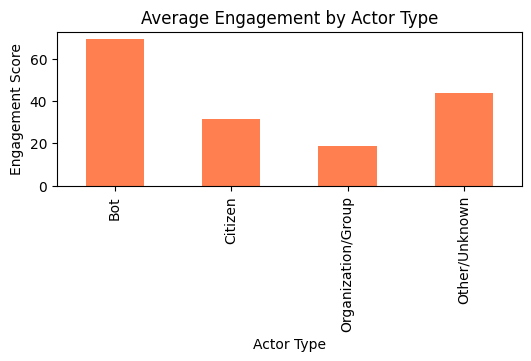

In [36]:
## Engagement by Actor Type

# Average engagement (retweets + likes) by actor type
df_no_bots['engagement'] = df_no_bots['retweet_count'] + df_no_bots['favorite_count']
actor_engagement = df.groupby('actor_type')['engagement'].mean()

# Plot engagement by actor type
plt.figure(figsize=(6, 2))
actor_engagement.plot(kind='bar', color='coral')
plt.title('Average Engagement by Actor Type')
plt.xlabel('Actor Type')
plt.ylabel('Engagement Score')
plt.show()


C:\Users\sutri\AppData\Local\Temp\ipykernel_33492\3115918417.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_bots['actor_type'] = df_no_bots.apply(classify_actor, axis=1)


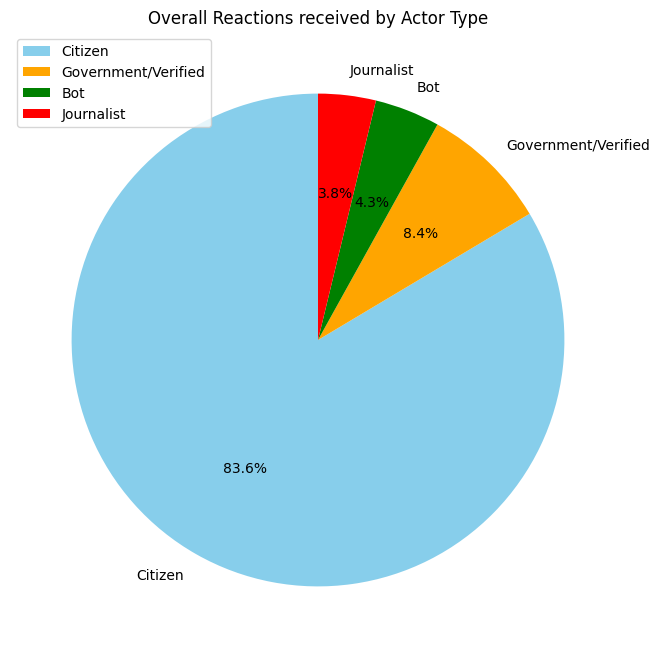

In [41]:

# Define a function to classify actor types
def classify_actor(row):
    description = str(row['user.description']).lower()
    statuses_count = row['user.statuses_count']
    followers_count = row['user.followers_count']
    verified = row['user.verified']

    # Rule-based classification
    if statuses_count > 5000 and followers_count < 100:
        return 'Bot'  # High activity, low followers
    elif verified:
        return 'Government/Verified'
    elif 'journalist' in description or 'media' in description:
        return 'Journalist'
    else:
        return 'Citizen'

# Apply the classification function
df_no_bots['actor_type'] = df_no_bots.apply(classify_actor, axis=1)

# Group by actor type and calculate total reactions
reactions_by_actor = (
    df.groupby('actor_type')['reactions']
    .sum()
    .sort_values(ascending=False)
)

# Plot the results as a pie chart
plt.figure(figsize=(8, 8))
reactions_by_actor.plot(
    kind='pie',
    autopct='%1.1f%%',  # Display percentages
    colors=['skyblue', 'orange', 'green', 'red'],  # Assign colors
    startangle=90,  # Rotate chart for better alignment
    legend=True
)

# Add chart title
plt.title('Overall Reactions received by Actor Type')
plt.ylabel('')  # Remove default ylabel
plt.show()


C:\Users\sutri\AppData\Local\Temp\ipykernel_33492\1616803777.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=actor_counts.values, y=actor_counts.index, palette='Set2')


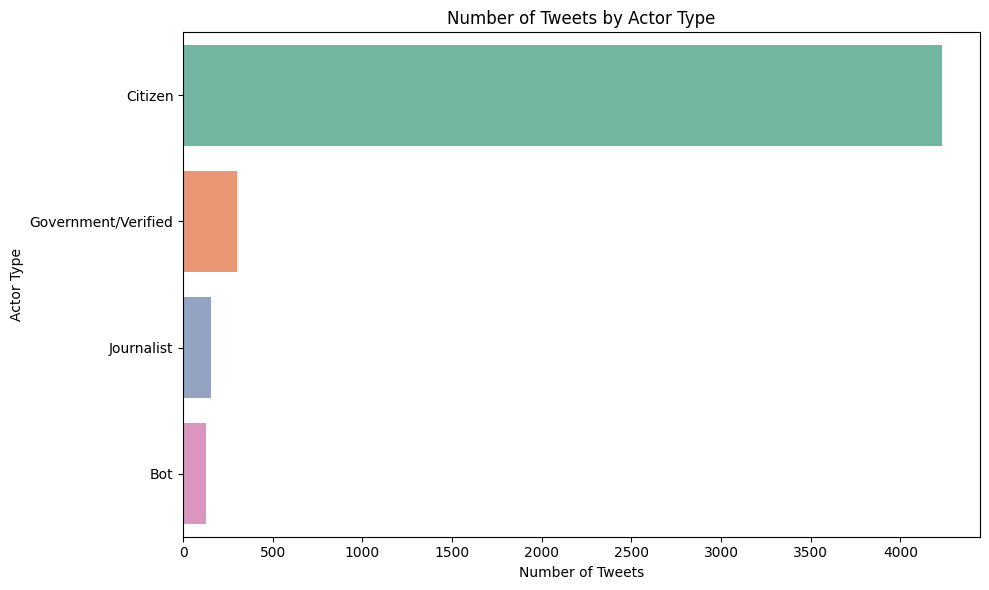

In [56]:
# Count tweets by actor type
actor_counts = df['actor_type'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=actor_counts.values, y=actor_counts.index, palette='Set2')
plt.title('Number of Tweets by Actor Type')
plt.xlabel('Number of Tweets')
plt.ylabel('Actor Type')
plt.tight_layout()
plt.show()

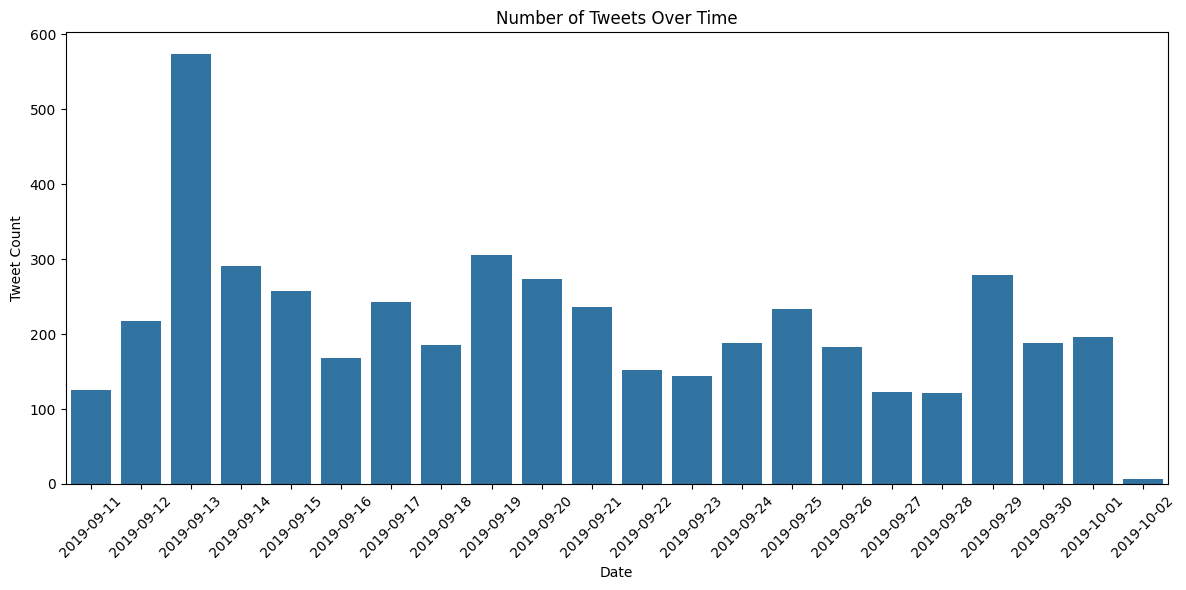

In [45]:
## Number of tweets over time

plt.figure(figsize=(12,6))
sns.countplot(x=df_no_bots['created_at'].dt.date)
plt.xticks(rotation=45)
plt.title('Number of Tweets Over Time')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.tight_layout()
plt.show()

C:\Users\sutri\AppData\Local\Temp\ipykernel_33492\1433068452.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.values, y=top_users.index, palette='viridis')


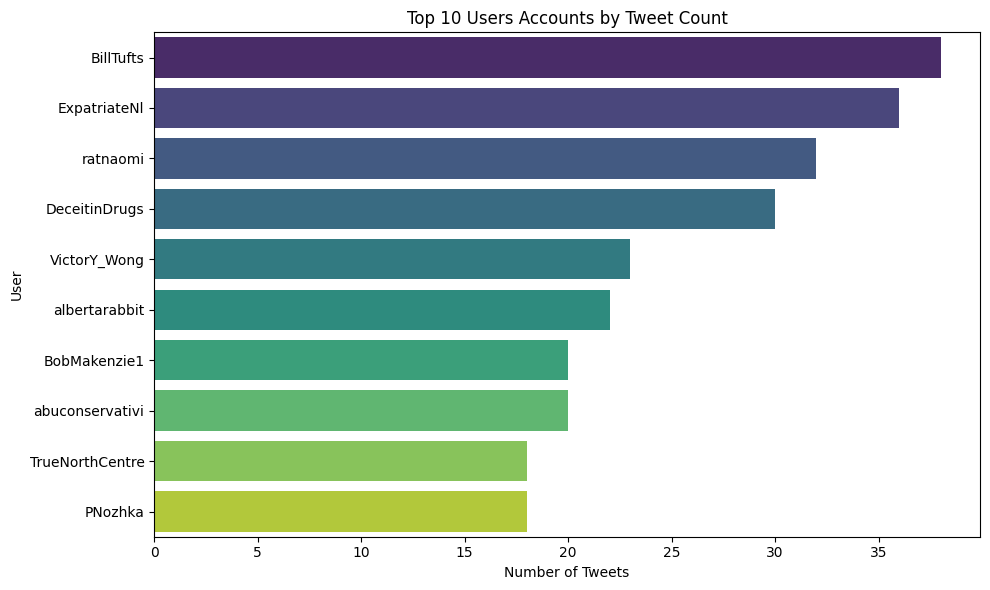

In [46]:
## Top Actors/Users in the Dataset

top_users = df_no_bots['user.screen_name'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_users.values, y=top_users.index, palette='viridis')
plt.title('Top 10 Users Accounts by Tweet Count')
plt.xlabel('Number of Tweets')
plt.ylabel('User')
plt.tight_layout()
plt.show()


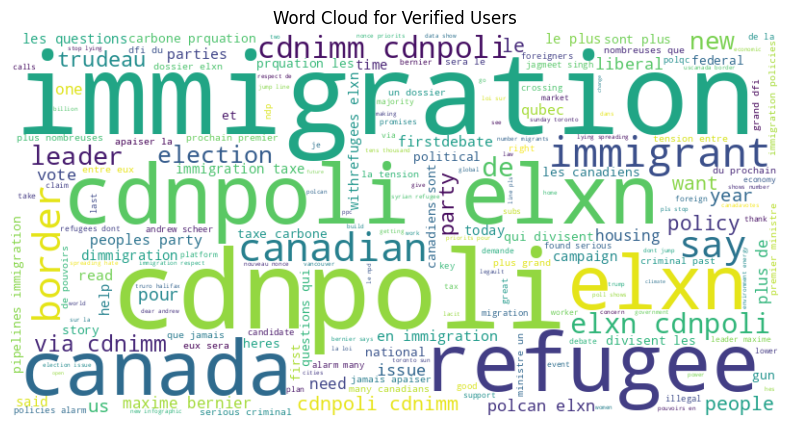

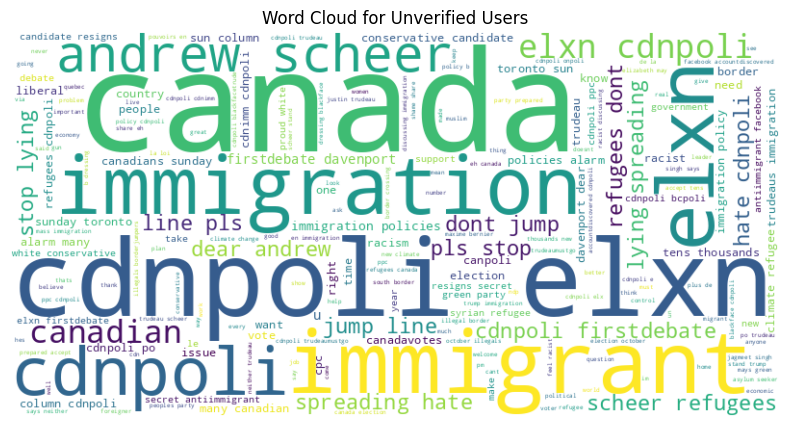

In [47]:
## Explore what Verified and Unverified users are talking about 

from wordcloud import WordCloud

# Filter tweets for verified and unverified users
verified_tweets = df_no_bots[df_no_bots['user_type'] == 'Verified']
unverified_tweets = df_no_bots[df_no_bots['user_type'] == 'Unverified']

# Verified users' word cloud
verified_text = ' '.join(verified_tweets['clean_text'])
verified_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(verified_text)

# Unverified users' word cloud
unverified_text = ' '.join(unverified_tweets['clean_text'])
unverified_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(unverified_text)

# Plotting word clouds
plt.figure(figsize=(10, 5))
plt.imshow(verified_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Verified Users')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(unverified_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Unverified Users')
plt.show()


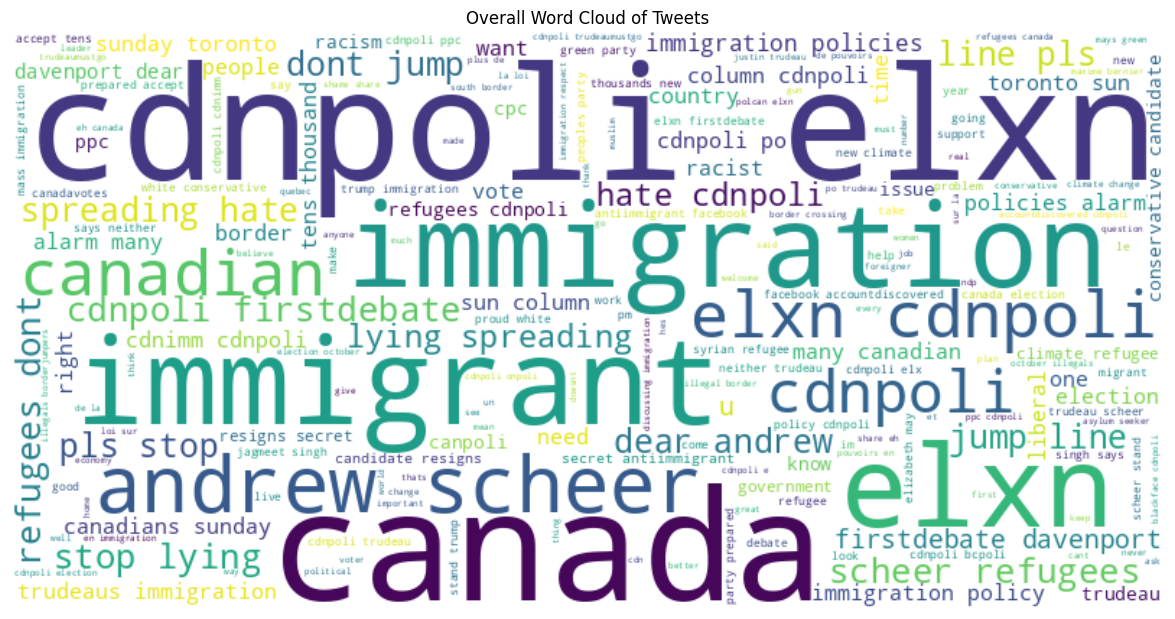

In [48]:
# Word Cloud of Common Words
# Combine all clean text
all_text = ' '.join(df_no_bots['clean_text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(15,7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Overall Word Cloud of Tweets')
plt.show()


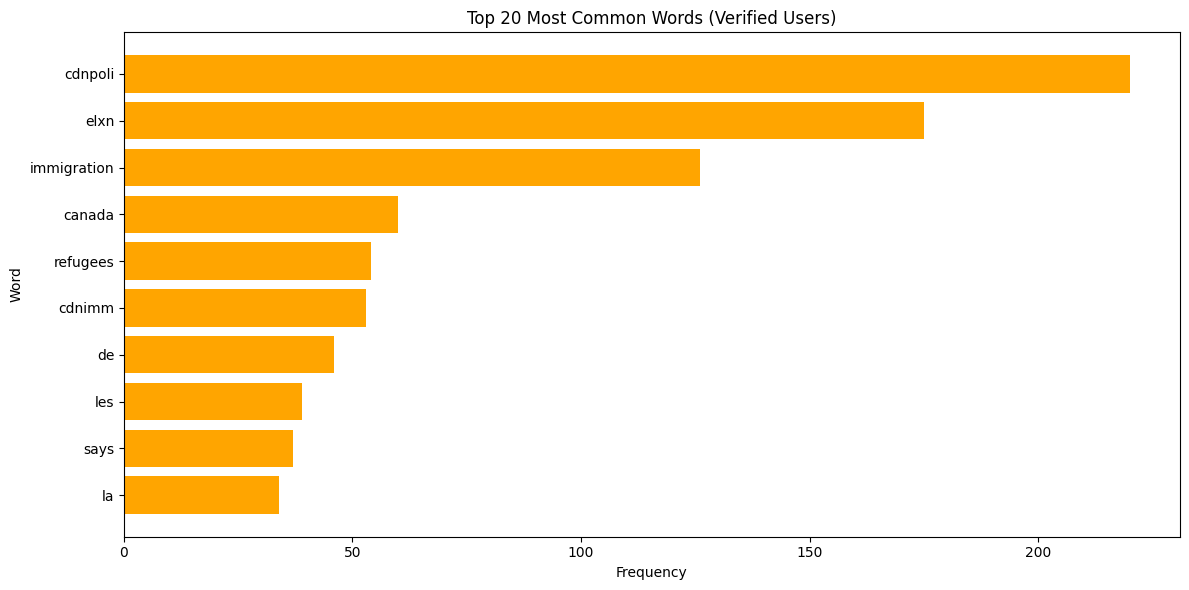

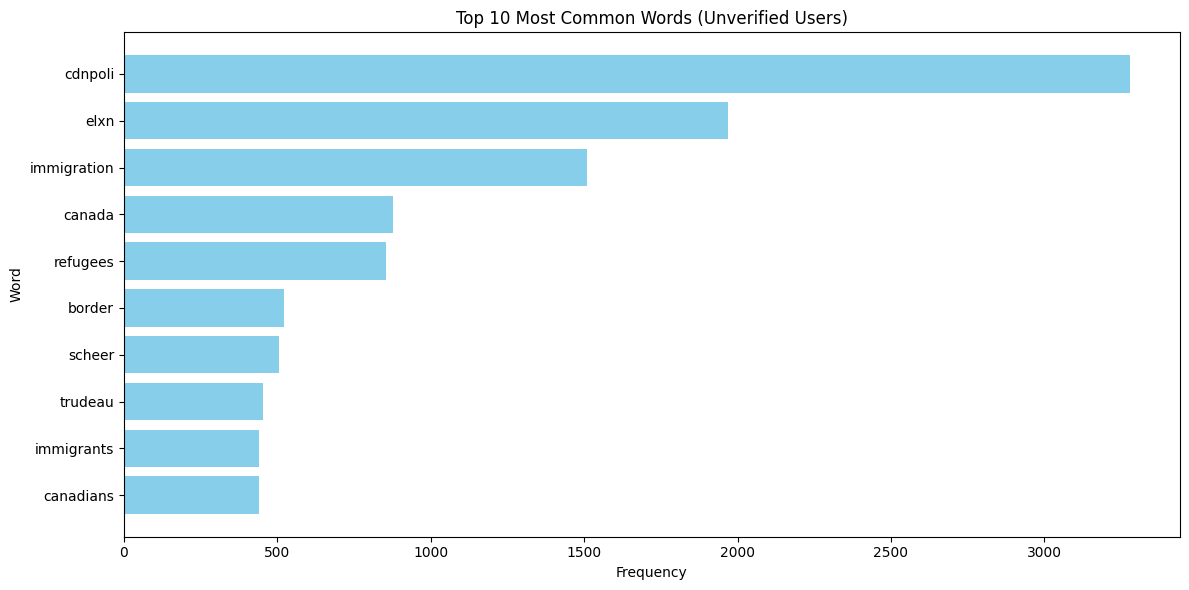

In [49]:
## using bar chart to confirm the most discussed 20 common words

from collections import Counter


# Filter tweets for verified and unverified users
verified_tweets = df_no_bots[df_no_bots['user_type'] == 'Verified']['clean_text']
unverified_tweets = df_no_bots[df_no_bots['user_type'] == 'Unverified']['clean_text']

# Function to get the top 20 most common words
def get_top_words(texts, n=10):
    all_words = ' '.join(texts).split()  # Combine all tweets and split into words
    word_counts = Counter(all_words)  # Count word frequencies
    return word_counts.most_common(n)

# Get the top 20 words for verified and unverified users
top_words_verified = get_top_words(verified_tweets)
top_words_unverified = get_top_words(unverified_tweets)

# Convert to DataFrame for easy plotting
verified_df = pd.DataFrame(top_words_verified, columns=['Word', 'Frequency'])
unverified_df = pd.DataFrame(top_words_unverified, columns=['Word', 'Frequency'])

# Plot histograms
plt.figure(figsize=(12, 6))
plt.barh(verified_df['Word'], verified_df['Frequency'], color='orange')
plt.title('Top 20 Most Common Words (Verified Users)')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.barh(unverified_df['Word'], unverified_df['Frequency'], color='skyblue')
plt.title('Top 10 Most Common Words (Unverified Users)')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()


In [50]:
# Reactions received by each tweets
df_no_bots['reactions'] = df_no_bots['retweet_count'] + df_no_bots['favorite_count']

# Group them up by user
user_stats = (
    df_no_bots.groupby('user.screen_name')
    .agg({'reactions': 'sum', 'user.screen_name': 'count'})
    .rename(columns={'user.screen_name': 'Tweet Count'})
    .sort_values(by='Tweet Count', ascending=False)  # Sort by the number of tweets
    .reset_index()
)

# Rename columns for simplicity
user_stats.columns = ['User', 'Total Reactions', 'Total Tweets']

# Find the user with the most tweets
most_tweets_user = user_stats.iloc[0]

# Display results
print("User with the Most Tweets:")
print(f"User: {most_tweets_user['User']}")
print(f"Total Tweets: {most_tweets_user['Total Tweets']}")
print(f"Total Reactions: {most_tweets_user['Total Reactions']}")

# Display the top 5 users with the most tweets
print("\nTop 5 Users by Number of Tweets:")
print(user_stats.head(6))


User with the Most Tweets:
User: BillTufts
Total Tweets: 38
Total Reactions: 1529.0

Top 5 Users by Number of Tweets:
            User  Total Reactions  Total Tweets
0      BillTufts           1529.0            38
1   ExpatriateNl              7.0            36
2       ratnaomi            374.0            32
3  DeceitinDrugs             93.0            30
4   VictorY_Wong             10.0            23
5  albertarabbit             75.0            22


C:\Users\sutri\AppData\Local\Temp\ipykernel_33492\1135351248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_bots['reactions'] = df_no_bots['retweet_count'] + df_no_bots['favorite_count']


In [51]:
## Total reactions for each tweet received by verified and non verified accounts

df_no_bots['reactions'] = df_no_bots['retweet_count'] + df_no_bots['favorite_count']

# Separate verified and unverified tweets
verified_tweets = df_no_bots[df_no_bots['user_type'] == 'Verified']
unverified_tweets = df_no_bots[df_no_bots['user_type'] == 'Unverified']

# Group by user and calculate total reactions and tweet count
verified_stats = (
    verified_tweets.groupby('user.screen_name')
    .agg({'reactions': 'sum', 'user.screen_name': 'count'})
    .rename(columns={'user.screen_name': 'Tweet Count'})
    .sort_values(by='reactions', ascending=False)
    .head(5)
    .reset_index()
)

unverified_stats = (
    unverified_tweets.groupby('user.screen_name')
    .agg({'reactions': 'sum', 'user.screen_name': 'count'})
    .rename(columns={'user.screen_name': 'Tweet Count'})
    .sort_values(by='reactions', ascending=False)
    .head(5)
    .reset_index()
)

# Rename columns for clarity
verified_stats.columns = ['User', 'Total Reactions', 'Tweet Count']
unverified_stats.columns = ['User', 'Total Reactions', 'Tweet Count']

# results
print("Top 5 Verified Users:")
print(verified_stats)

print("\nTop 5 Unverified Users:")
print(unverified_stats)


Top 5 Verified Users:
            User  Total Reactions  Tweet Count
0      sunlorrie           2420.0            8
1    brianlilley           1565.0            6
2    maritstiles            959.0            1
3  pressprogress            777.0            1
4     globalnews            764.0           16

Top 5 Unverified Users:
           User  Total Reactions  Tweet Count
0       flange5           3277.0            1
1  sarbjitkaur1           3104.0            2
2  RitikaGoelTO           2884.0            3
3       EmmaMci           2875.0            2
4      schtev69           2110.0           16


C:\Users\sutri\AppData\Local\Temp\ipykernel_33492\2210134977.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_bots['reactions'] = df_no_bots['retweet_count'] + df_no_bots['favorite_count']


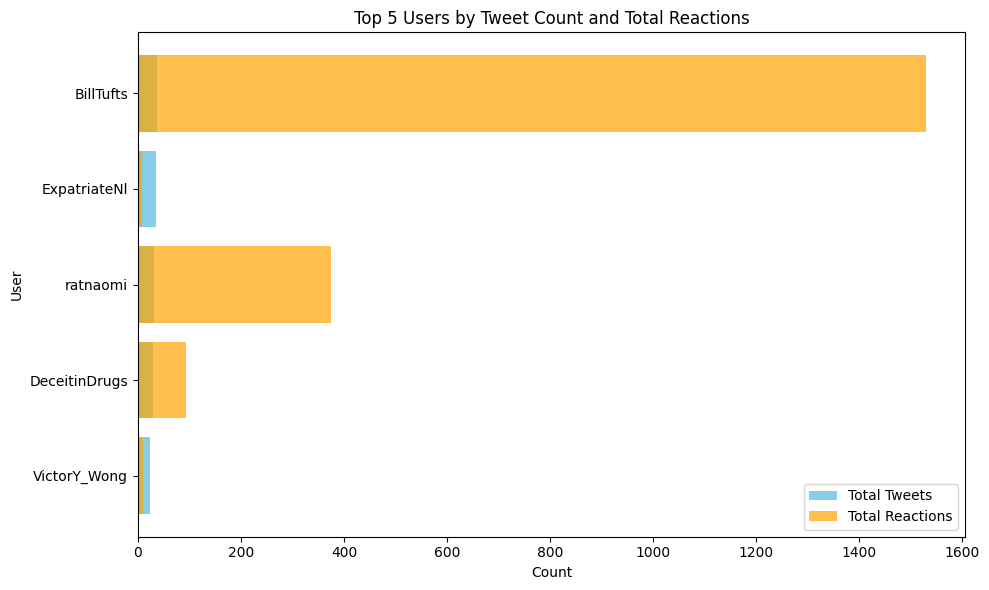

In [52]:

# Top 5 verified users with thie reaction ratio 
top_users = user_stats.head(5)

plt.figure(figsize=(10, 6))
plt.barh(top_users['User'], top_users['Total Tweets'], color='skyblue', label='Total Tweets')
plt.barh(top_users['User'], top_users['Total Reactions'], color='orange', label='Total Reactions', alpha=0.7)

plt.title('Top 5 Users by Tweet Count and Total Reactions')
plt.xlabel('Count')
plt.ylabel('User')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.legend()
plt.tight_layout()
plt.show()


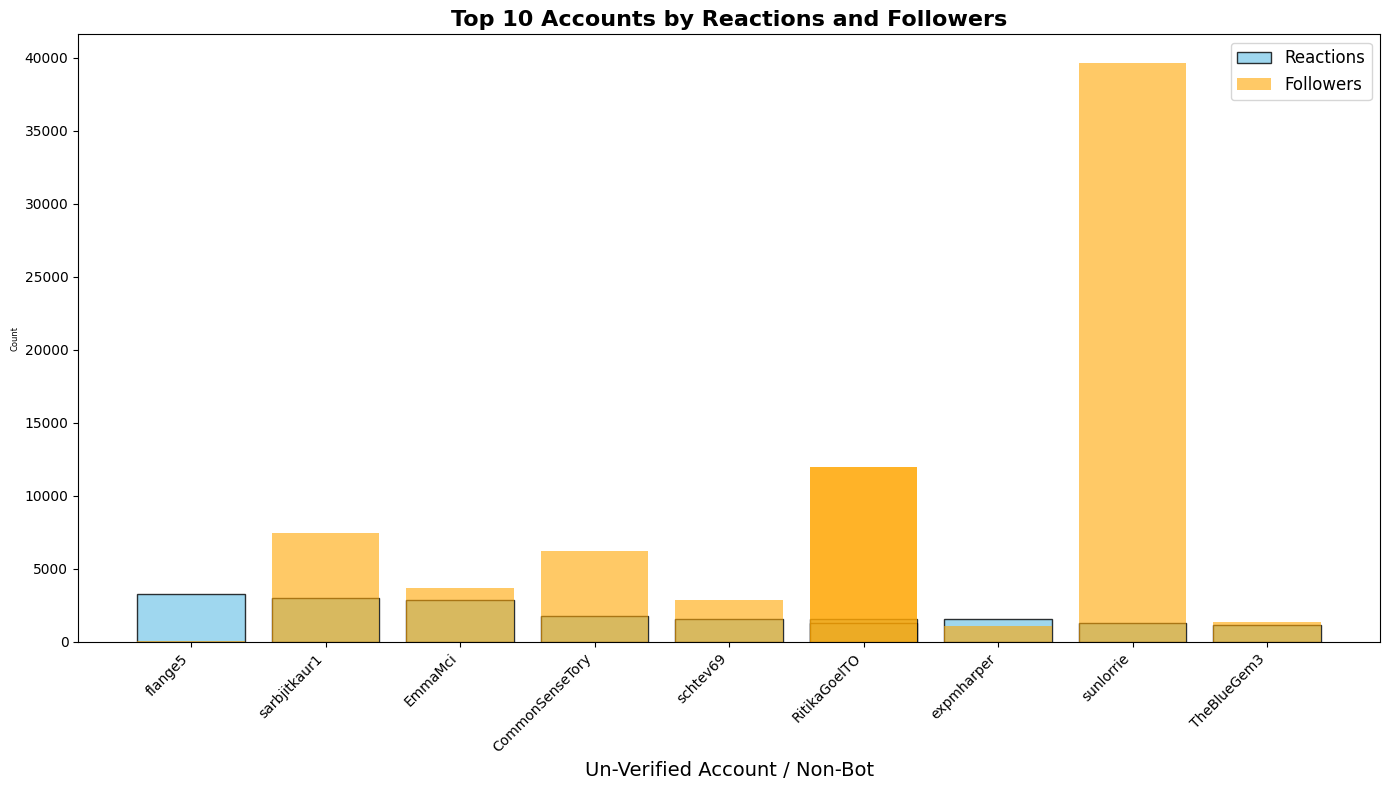

In [53]:
## checking the top 10 accounts from Non-Verified users with their reactions
most_reactions_accounts = df_no_bots.sort_values(by='reactions', ascending=False).head(10)

# Extract relevant columns for plotting reactions and followers
reactions_followers = most_reactions_accounts[['user.screen_name', 'reactions', 'user.followers_count']]

# Plot reactions and followers
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

# Plot reactions
plt.bar(
    reactions_followers['user.screen_name'], 
    reactions_followers['reactions'], 
    label='Reactions', 
    color='skyblue', 
    alpha=0.8, 
    edgecolor='black'
)

# Plot followers
plt.bar(
    reactions_followers['user.screen_name'], 
    reactions_followers['user.followers_count'], 
    label='Followers', 
    color='orange', 
    alpha=0.6
)

# Add titles and labels
plt.title('Top 10 Accounts by Reactions and Followers', fontsize=16, fontweight='bold')
plt.xlabel('Un-Verified Account / Non-Bot', fontsize=14)
plt.ylabel('Count', fontsize=6)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\sutri\AppData\Local\Temp\ipykernel_33492\2981507783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_bots['date'] = df_no_bots['created_at'].dt.date


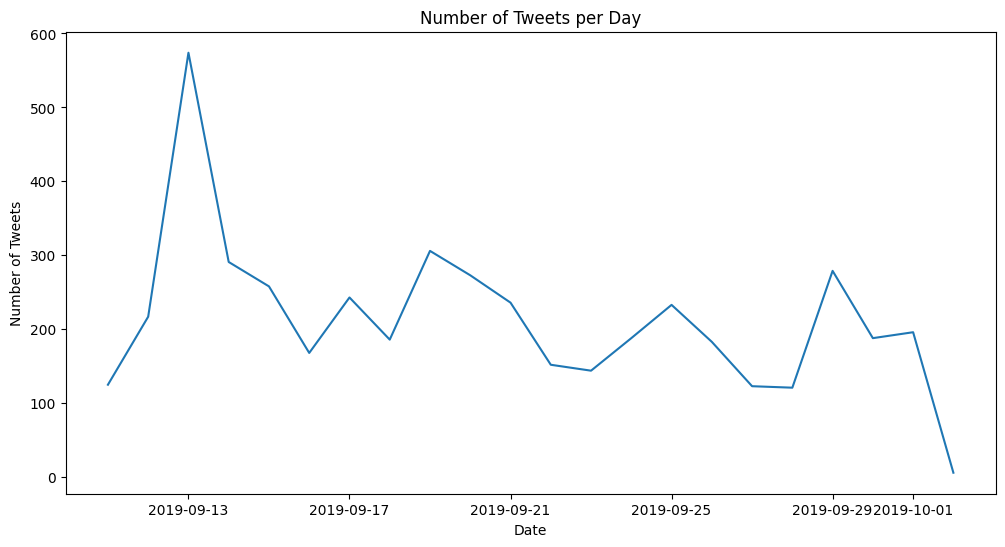

In [54]:

# Extract date from 'created_at'
df_no_bots['date'] = df_no_bots['created_at'].dt.date

# Number of tweets per day
tweets_per_day = df_no_bots.groupby('date').size()

# Plot tweets per day
plt.figure(figsize=(12,6))
tweets_per_day.plot()
plt.title('Number of Tweets per Day')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

C:\Users\sutri\AppData\Local\Temp\ipykernel_33492\3447709.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=actor_counts.values, y=actor_counts.index, palette='Set2')


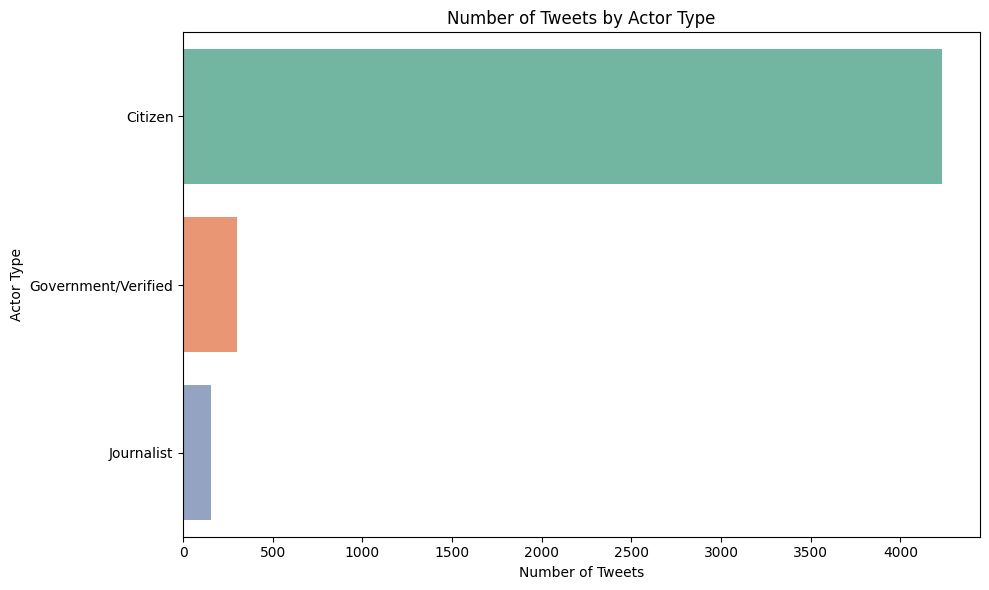

In [55]:
# Count tweets by actor type
actor_counts = df_no_bots['actor_type'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=actor_counts.values, y=actor_counts.index, palette='Set2')
plt.title('Number of Tweets by Actor Type')
plt.xlabel('Number of Tweets')
plt.ylabel('Actor Type')
plt.tight_layout()
plt.show()

Sentiment analysis

In [57]:
#impoeting library for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Initialize sentiment analyzer
sid = SentimentIntensityAnalyzer()




[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sutri\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


C:\Users\sutri\AppData\Local\Temp\ipykernel_33492\4150526911.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_bots['sentiment'] = df_no_bots['clean_text'].apply(get_sentiment)
C:\Users\sutri\AppData\Local\Temp\ipykernel_33492\4150526911.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_bots['sentiment_type'] = df_no_bots['sentiment'].apply(lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral'))
C:\Users\sutri\AppData\Local\Temp\ipykernel_33492\4150526911.py:14: Futu

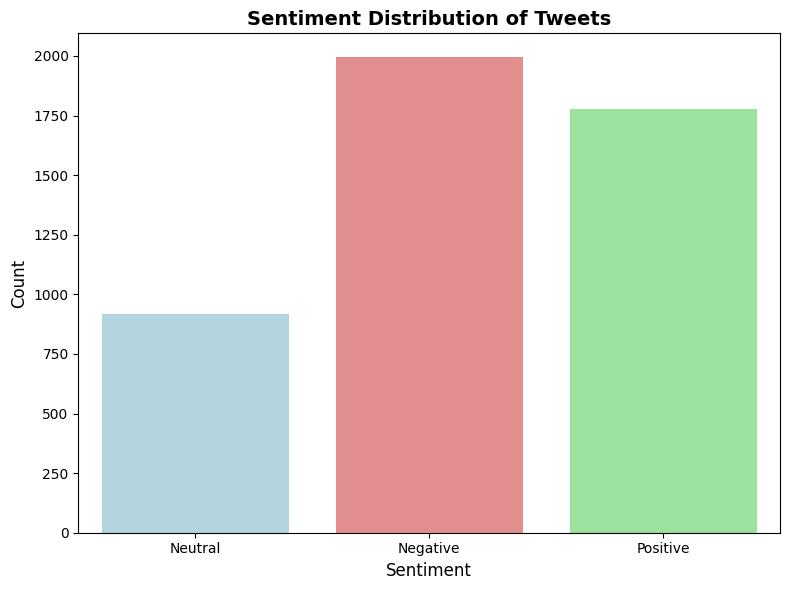

In [58]:
# Function to compute sentiment
def get_sentiment(text):
    scores = sid.polarity_scores(text)
    return scores['compound']

# Apply sentiment analysis
df_no_bots['sentiment'] = df_no_bots['clean_text'].apply(get_sentiment)

# Classify sentiment
df_no_bots['sentiment_type'] = df_no_bots['sentiment'].apply(lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral'))

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(
    x='sentiment_type', 
    data=df_no_bots, 
    palette={'Negative': 'lightcoral', 'Positive': 'lightgreen', 'Neutral': 'lightblue'}
)
plt.title('Sentiment Distribution of Tweets', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

In [59]:
## Polarity sentiment analysis
# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# reactions
df_no_bots['reactions'] = df_no_bots['retweet_count'] + df_no_bots['favorite_count']

# Remove bots data frame
df_no_bots = df[df['actor_type'] != 'Bot']

# top 10 postw with reactions
top_10_tweets = df_no_bots.sort_values(by='reactions', ascending=False).head(10)[['clean_text', 'reactions']]

# Randomly sample 4 other tweets
random_4_tweets = df_no_bots.sample(n=4, random_state=10000)[['clean_text']]

# Combine the top 10 and random 4 tweets into one DF to analyze sentiment
all_tweets = pd.concat([top_10_tweets, random_4_tweets], ignore_index=True).fillna({'reactions': 'Random'})

# Performing sentiment analysis
def get_sentiment(text):
    return sid.polarity_scores(text)

all_tweets['sentiment'] = all_tweets['clean_text'].apply(get_sentiment)

# Split sentiment into separate columns
all_tweets[['neg', 'neu', 'pos', 'compound']] = all_tweets['sentiment'].apply(pd.Series)

# Final table with required columns
final_table = all_tweets[['clean_text', 'reactions', 'neg', 'neu', 'pos', 'compound']]

# Display the table
print(final_table)



                                           clean_text reactions    neg    neu  \
0   new immigration lawyers report canadian muslim...    3277.0  0.244  0.756   
1   father called say vote justin trudeau matter f...    3021.0  0.000  0.525   
2   andrew scheer said refugees jumping line thats...    2864.0  0.000  1.000   
3   remember told heckler racism place canada woma...    1745.0  0.355  0.547   
4   trudeau flew syrian islamists housed gave cheq...    1603.0  0.105  0.782   
5   immigration policies keep especially latinx bl...    1577.0  0.160  0.840   
6   youre white person feigning concern racism bc ...    1548.0  0.417  0.489   
7   cbc reports people wonder complained elections...    1309.0  0.228  0.772   
8   structures continue exist marginalize many amo...    1276.0  0.185  0.815   
9   true cpc wins election provinces conservative ...    1193.0  0.082  0.653   
10  new report rbc economics says growing wage gap...    Random  0.000  0.898   
11  unarguably incredible th

C:\Users\sutri\AppData\Local\Temp\ipykernel_33492\1338271834.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_bots['reactions'] = df_no_bots['retweet_count'] + df_no_bots['favorite_count']


In [60]:
## reading previous full text
pd.set_option('display.max_colwidth', None) 
print(final_table['clean_text'].to_string(index=False))

                                                                                                                                   new immigration lawyers report canadian muslims denied entry us cdnpoli
                                            father called say vote justin trudeau matter father loved people let immigrants opposition junior hope appreciates love people always strive deserving cdnpoli
                                                                                                    andrew scheer said refugees jumping line thats false factchecked many times heres one firstdebate elxn
                                             remember told heckler racism place canada woman merely questioned trudeau governments spending illegal immigrants like blackfacetrudeau trudeaumustgo cdnpoli
                      trudeau flew syrian islamists housed gave cheques trudeau opened borders one tweet free housingcashmedical poor first nations canadian go un plead drinking water trud

In [61]:
## Emotion-based sentiment analysis

from textblob import TextBlob

# Extract the top 10 most reacted tweets
top_10_reacted = df_no_bots.sort_values(by='reactions', ascending=False).head(10)

# Extract 4 random tweets
random_4_tweets = df_no_bots.sample(n=4, random_state=42)

# Combine the top 10 and random 4 tweets
selected_tweets = pd.concat([top_10_reacted, random_4_tweets], ignore_index=True)

# Analyze sentiment (polarity and subjectivity) for each tweet
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply the analysis
selected_tweets[['polarity', 'subjectivity']] = selected_tweets['clean_text'].apply(lambda x: analyze_sentiment(x)).apply(pd.Series)

# Add a sentiment status column
def classify_sentiment(polarity):
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

selected_tweets['sentiment_status'] = selected_tweets['polarity'].apply(classify_sentiment)

# Display the results
final_table = selected_tweets[['clean_text', 'reactions', 'polarity', 'subjectivity', 'sentiment_status']]
import pandas as pd; final_table


clean_text  \
0                                                                                                                                      new immigration lawyers report canadian muslims denied entry us cdnpoli   
1                                               father called say vote justin trudeau matter father loved people let immigrants opposition junior hope appreciates love people always strive deserving cdnpoli   
2                                                                                                       andrew scheer said refugees jumping line thats false factchecked many times heres one firstdebate elxn   
3                                                remember told heckler racism place canada woman merely questioned trudeau governments spending illegal immigrants like blackfacetrudeau trudeaumustgo cdnpoli   
4                         trudeau flew syrian islamists housed gave cheques trudeau opened borders one tweet free housingcashmedical poor first nations canadian go un plead drinking water trudeaumustgo elxn   
5               immigration policies keep especially latinx black filipino migrants working low wage precarious jobs limited pathways permanent immigration status therefore membership rights country cdnpoli   
6                                                                                youre white person feigning concern racism bc yo photos remember welcoming brown refugees canada calling crisis get hell elxn   
7                                          cbc reports people wonder complained elections canada trudeaus blackface scandal set time story may constitute undue influence foreigners canadian election cdnpoli   
8   structures continue exist marginalize many among us whether racialized ppl immigrants women lgbtq folks ppl w disabilities ppl living poverty lift veil power structures work fight nothing change cdnpoli   
9              true cpc wins election provinces conservative leaders scheer could change charter rights could reverse womans rights reverse lgbtq rights immigrant rights ect true scared canpoli cdnpoli elxn   
10                                                                                                                                       im sure isolated incident immigrationreform cdnpoli elxn ppcalltheway   
11                                                                                                                                                              lets start auspicious background first cdnpoli   
12                                                                                                                                             dont let mainstream media fool still crisis border cdnpoli elxn   
13                                                                                                      dear andrew scheer refugees dont jump line pls stop lying spreading hate cdnpoli firstdebate davenport   

    reactions  polarity  subjectivity sentiment_status  
0      3277.0  0.136364      0.454545         Positive  
1      3021.0  0.600000      0.733333         Positive  
2      2864.0  0.050000      0.550000         Positive  
3      1745.0 -0.500000      0.500000         Negative  
4      1603.0  0.083333      0.577778         Positive  
5      1577.0 -0.059524      0.469048         Negative  
6      1548.0  0.000000      0.000000          Neutral  
7      1309.0 -0.300000      0.200000         Negative  
8      1276.0  0.500000      0.500000         Positive  
9      1193.0  0.333333      0.500000         Positive  
10        8.0  0.500000      0.888889         Positive  
11        1.0  0.250000      0.333333         Positive  
12       38.0  0.000000      0.000000          Neutral  
13      280.0 -0.800000      0.900000         Negative

Handling Sarcasm

In [64]:
## without using ML models to check the sarcasm ratio / Self created bag of words which could possible for sarcasm

## didnt use ML models or add new Dataset to handle sarcasm. If they were being deployed, the answers would be definately alter. 
## We decided to apply cherry picked sarcasm words.

# **Method 1: Use Linguistic Patterns (Rule-Based Heuristics)**

def detect_sarcasm_rule_based(text):
    # List of common sarcasm indicators
    sarcasm_indicators = [
    "yeah right", "sure thing", "totally", "as if", "of course", "obviously", "sure", "not really",
    "just great", "fantastic", "well done", "what a surprise", "oh joy", "how convenient", 
    "brilliant idea", "just what we needed", "great job", "super helpful", "perfect timing",
    "oh sure", "good luck with that", "what could go wrong", "this is fine", "thank you so much", 
    "that was smart", "great move", "nice try", "really helpful", "so glad", "just perfect", 
    "truly amazing", "absolutely", "what an improvement", "so impressive", "how thoughtful",
    "such a genius", "that's original", "love it", "highly doubt it", "what else is new", 
    "how unexpected", "very likely", "I'm shocked", "nothing to see here"
]
    text_lower = text.lower()
    
    # Check for sarcasm indicators from the text
    for phrase in sarcasm_indicators:
        if phrase in text_lower:
            return "Sarcastic"
    return "Not Sarcastic"

# Apply the rule-based sarcasm detection to the dataset
df_no_bots['sarcasm_label_rule_based'] = df_no_bots['clean_text'].apply(detect_sarcasm_rule_based)




C:\Users\sutri\AppData\Local\Temp\ipykernel_33492\1166080520.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_bots['sarcasm_label_rule_based'] = df_no_bots['clean_text'].apply(detect_sarcasm_rule_based)


From the results, we concluded we ignore sarcasm

In [ ]:

# **Sentiment-Context Mismatch Detection**
def detect_sarcasm_by_sentiment(text, context):
    # Perform sentiment analysis
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity

    # Define the sentiment-context mismatch logic
    if polarity > 0 and "negative" in context:  # Positive sentiment in a negative context
        return "Sarcastic"
    elif polarity < 0 and "positive" in context:  # Negative sentiment in a positive context
        return "Sarcastic"
    else:
        return "Not Sarcastic"

# For demonstration, let's assume a 'context' column exists or default to 'neutral'
df_no_bots['context'] = "neutral"  # Replace this with actual context data if available
df_no_bots['sarcasm_label_sentiment_context'] = df_no_bots.apply(
    lambda row: detect_sarcasm_by_sentiment(row['clean_text'], row['context']),
    axis=1
)

# Display the results
sarcasm_results = df_no_bots[['clean_text', 'sarcasm_label_rule_based', 'sarcasm_label_sentiment_context']]
import pandas as pd; sarcasm_results

C:\Users\sutri\AppData\Local\Temp\ipykernel_33492\2871385104.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_bots['context'] = "neutral"  # Replace this with actual context data if available
C:\Users\sutri\AppData\Local\Temp\ipykernel_33492\2871385104.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_bots['sarcasm_label_sentiment_context'] = df_no_bots.apply(


clean_text  \
0                                                                                                                                                                                                                 wonder wait dont immigration cdnpoli   
1                                                                                                                                     warning canadians threat open borders unglobalist interests want cheap labour social disruption cdnpoli election   
2     sleeping forever vote liberals forallpeople diversity people immigrants indigenous jobs neverscheer noscheerwhitenationalism noscheerhypocrisy trudeaumuststay canadavotes noscheercuts scheerford cuts chooseforward chooseliberal peoplematter   
3                                                              snclavalin never existed would andrewscheer talking today last fall faux outrage healing lodge transfers similar trnsfrs harper came light janapril border scheer offering cdnpoli elxn   
4                                                                                                                                                         immigrant diversity killed canadian history historyteacher cdnpoli qanon thegreatreplacement   
...                                                                                                                                                                                                                                                ...   
4961                                                                                                                         isnt true immigrants come canada apply become canadian citizens go back came collect benefits canadian askcbcnews cdnpoli   
4962                                                                                                                                          unhcr canada referenced times piece info irregular border crossings check fact sheet cdnimm elxn cdnpoli   
4963                                                                                                         questions immigration issues heading election tweet well discuss tonight cbc news network see live pm est ask cbc news cdnpoli askcbcnews   
4964                                                                             fundamentally talking immunizing fewer children mothers dying childbirth less potable water refugees suffering conflict zones canpoli elxn elxn scheernotasadvertised   
4965                                                       onward lawsuit canadian fatca iga canada needs stop unjust us extraterritorial law overregulation border us busted nations signed nonreciprocal extortionist fatca canpol canpoli taxreform   

     sarcasm_label_rule_based sarcasm_label_sentiment_context  
0               Not Sarcastic                   Not Sarcastic  
1               Not Sarcastic                   Not Sarcastic  
2               Not Sarcastic                   Not Sarcastic  
3               Not Sarcastic                   Not Sarcastic  
4               Not Sarcastic                   Not Sarcastic  
...                       ...                             ...  
4961            Not Sarcastic                   Not Sarcastic  
4962            Not Sarcastic                   Not Sarcastic  
4963            Not Sarcastic                   Not Sarcastic  
4964            Not Sarcastic                   Not Sarcastic  
4965            Not Sarcastic                   Not Sarcastic  

[4690 rows x 3 columns]

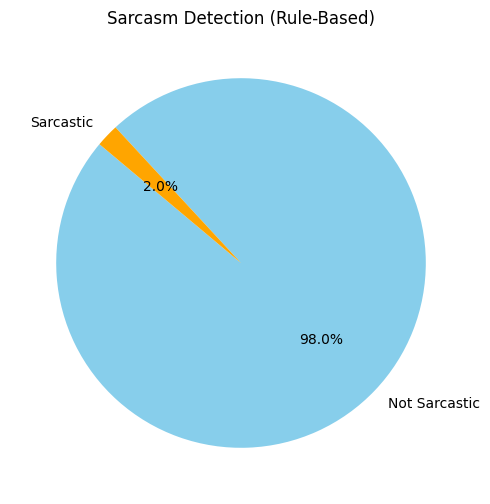

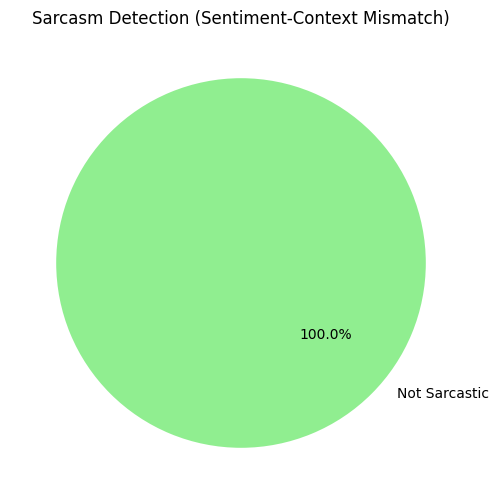

In [66]:
# Count the sarcasm labels for both methods
rule_based_counts = df_no_bots['sarcasm_label_rule_based'].value_counts(normalize=True) * 100
sentiment_context_counts = df_no_bots['sarcasm_label_sentiment_context'].value_counts(normalize=True) * 100

rule_based_labels = rule_based_counts.index
rule_based_sizes = rule_based_counts.values

sentiment_context_labels = sentiment_context_counts.index
sentiment_context_sizes = sentiment_context_counts.values

# Plotting Rule-Based Sarcasm Detection Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(rule_based_sizes, labels=rule_based_labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange'])
plt.title("Sarcasm Detection (Rule-Based)")
plt.show()

# Plotting Sentiment-Context Mismatch Detection Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_context_sizes, labels=sentiment_context_labels, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.title("Sarcasm Detection (Sentiment-Context Mismatch)")
plt.show()


In [67]:
# Function to calculate sentiment polarity
def calculate_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity  # Polarity ranges from -1 (negative) to 1 (positive)

# Add a sentiment column to df_no_bots
df_no_bots['sentiment'] = df_no_bots['clean_text'].apply(calculate_sentiment)

C:\Users\sutri\AppData\Local\Temp\ipykernel_33492\274413604.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_bots['sentiment'] = df_no_bots['clean_text'].apply(calculate_sentiment)


user_type
Unverified    0.015301
Verified      0.085358
Name: sentiment, dtype: float64


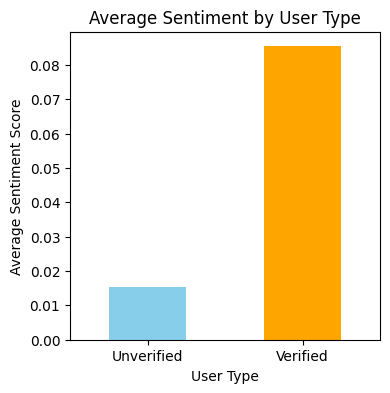

In [68]:
# Calculate average sentiment scores by user type / calculate using polarity
## verified users tweets more positive sentiment
sentiment_by_user_type = df_no_bots.groupby('user_type')['sentiment'].mean()

# Display sentiment comparison
print(sentiment_by_user_type)

# Plot sentiment comparison
sentiment_by_user_type.plot(kind='bar', color=['skyblue', 'orange'], figsize=(4, 4))
plt.title('Average Sentiment by User Type')
plt.xlabel('User Type')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=0)
plt.show()

In [71]:
# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Calculate sentiment scores
def get_sentiment(text):
    scores = sid.polarity_scores(text)
    return scores['compound']  # Use 'compound' as the overall sentiment score

# Add sentiment scores to DataFrame
df_no_bots['adjusted_sentiment'] = df_no_bots['clean_text'].apply(get_sentiment)

# Check if sentiment was calculated
print(df_no_bots[['clean_text', 'adjusted_sentiment']].head())

                                                                                                                                                                                                                                         clean_text  \
0                                                                                                                                                                                                              wonder wait dont immigration cdnpoli   
1                                                                                                                                  warning canadians threat open borders unglobalist interests want cheap labour social disruption cdnpoli election   
2  sleeping forever vote liberals forallpeople diversity people immigrants indigenous jobs neverscheer noscheerwhitenationalism noscheerhypocrisy trudeaumuststay canadavotes noscheercuts scheerford cuts chooseforward chooseliberal peoplematter   
3           

C:\Users\sutri\AppData\Local\Temp\ipykernel_33492\61503922.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_bots['adjusted_sentiment'] = df_no_bots['clean_text'].apply(get_sentiment)


C:\Users\sutri\AppData\Local\Temp\ipykernel_33492\2275222063.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_bots['created_at'] = pd.to_datetime(df_no_bots['created_at'])


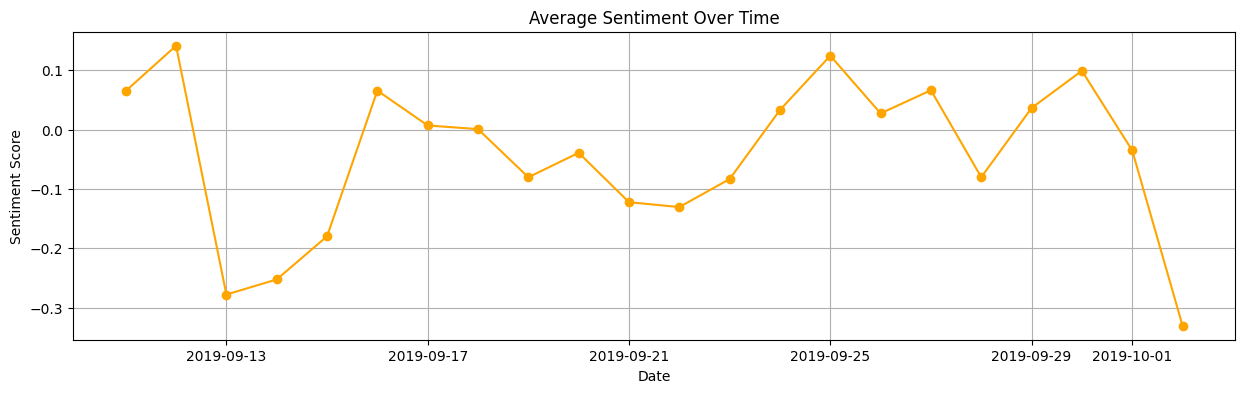

In [72]:
## actor analysis - Sentiment by Actor Type
# Average sentiment by actor type
df_no_bots['created_at'] = pd.to_datetime(df_no_bots['created_at'])

# Group by date and calculate average sentiment
daily_sentiment = df_no_bots.groupby(df_no_bots['created_at'].dt.date)['adjusted_sentiment'].mean()

# Plot sentiment trend over time
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 4))
plt.plot(daily_sentiment.index, daily_sentiment.values, marker='o', color='orange')
plt.title('Average Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.grid()
plt.show()
## 

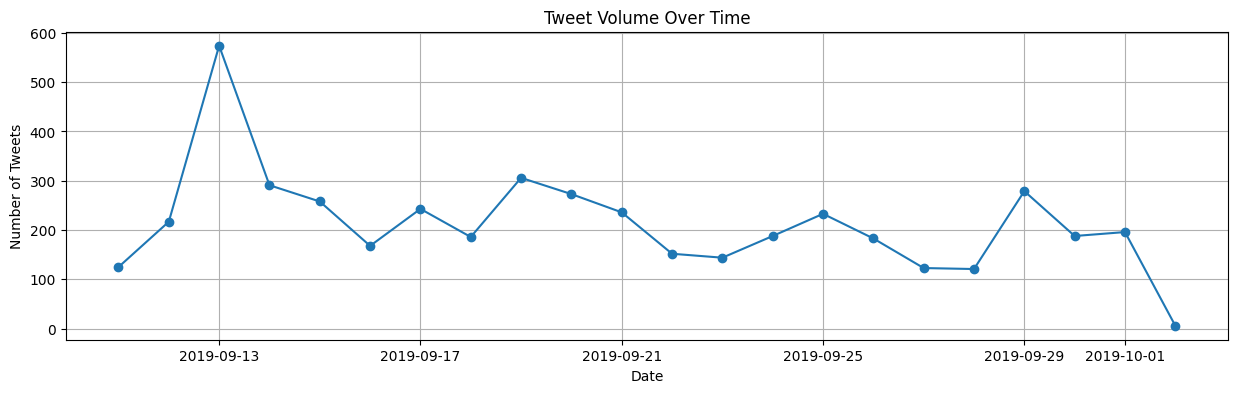

In [73]:
## temporal analysis - Volume of tweets over time 
# Convert 'created_at' to datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Group tweets by date
daily_tweet_volume = df.groupby(df_no_bots['created_at'].dt.date).size()

# Plot tweet volume
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 4))
plt.plot(daily_tweet_volume.index, daily_tweet_volume.values, marker='o')
plt.title('Tweet Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid()
plt.show()



C:\Users\sutri\AppData\Local\Temp\ipykernel_33492\2658192444.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='actor_type', y='sentiment', data=df_no_bots, palette='Set3')


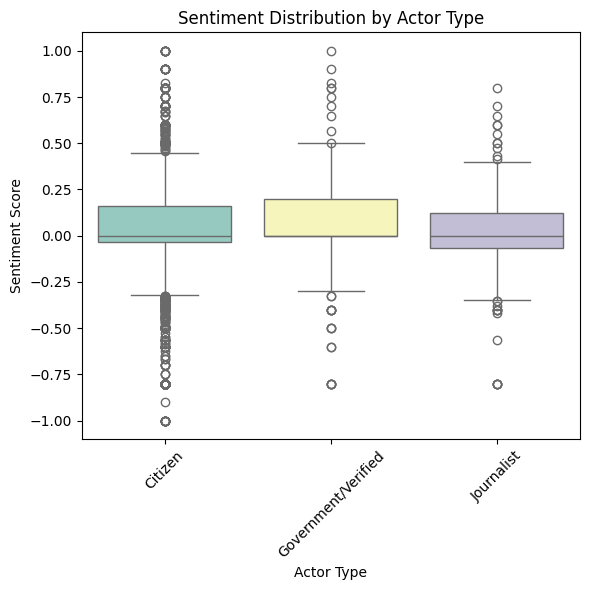

In [74]:
#Sentiment by Actor Type
plt.figure(figsize=(6,6))
sns.boxplot(x='actor_type', y='sentiment', data=df_no_bots, palette='Set3')
plt.title('Sentiment Distribution by Actor Type')
plt.xlabel('Actor Type')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Scenario base analysis**
- Below chart is showing us that Government or Verified blue marked users has tweeted spiked on Sept 25 to 27


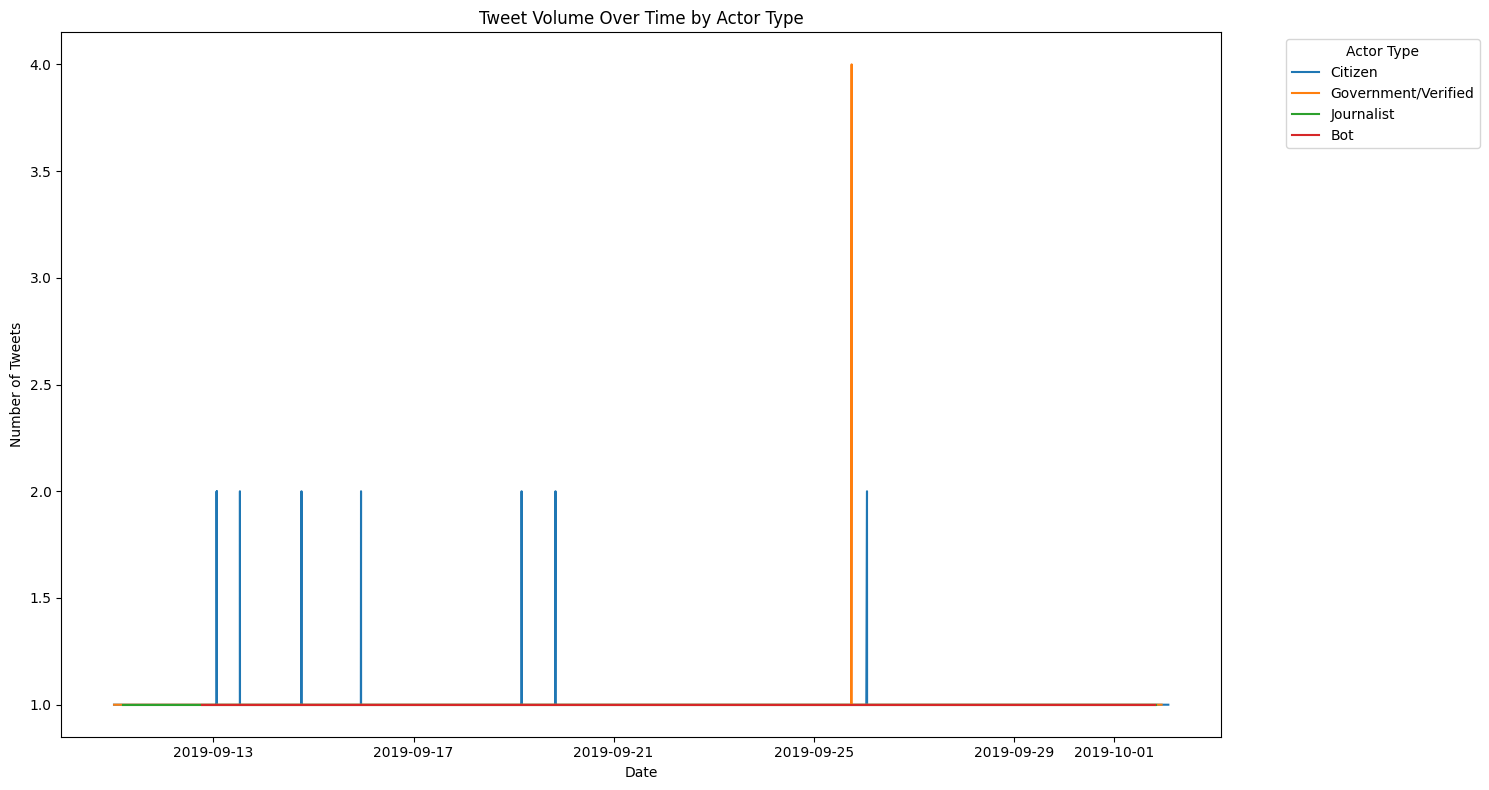

In [75]:
# Temporal Analysis by Actor Type
# Example: Tweets over time by actor type
plt.figure(figsize=(15,8))
sns.lineplot(x='created_at', y='count', hue='actor_type', data=df.groupby(['created_at', 'actor_type']).size().reset_index(name='count'))
plt.title('Tweet Volume Over Time by Actor Type')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.legend(title='Actor Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [76]:
# Filter for tweets from verified users during the specified date range
spike_tweets = df_no_bots[(df_no_bots['user.verified'] == True) & 
                  (df_no_bots['created_at'] >= '2019-09-25') & 
                  (df_no_bots['created_at'] <= '2019-09-27')]

# Checking the total reactions
spike_tweets['reactions'] = spike_tweets['retweet_count'] + spike_tweets['favorite_count']

# most tweeted results on that period
top_spike_tweets = spike_tweets.sort_values(by='reactions', ascending=False)[['clean_text', 'reactions']].head(10)

# results
print("Top 10 Verified Tweets by Reactions (Sept 25-27, 2019):")
print(top_spike_tweets)

Top 10 Verified Tweets by Reactions (Sept 25-27, 2019):
                                                                                                                                                                                                            clean_text  \
3894                                                                                             peoples party canada leader maxime bernier said elected would cut immigration numbers nearly half people year cdnpoli   
3643                                                                  asked party would make housing affordable multicultural city nation maximebernier offered stark reply fewer immigrants said lower taxes election   
3613                                                    foreign affairs minister stripped waseem ramli honorary consul status syria reports support assad regime concerns raised syrian refugees montreal elxn cdnpoli   
3755                                                                    

C:\Users\sutri\AppData\Local\Temp\ipykernel_33492\3746968150.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spike_tweets['reactions'] = spike_tweets['retweet_count'] + spike_tweets['favorite_count']


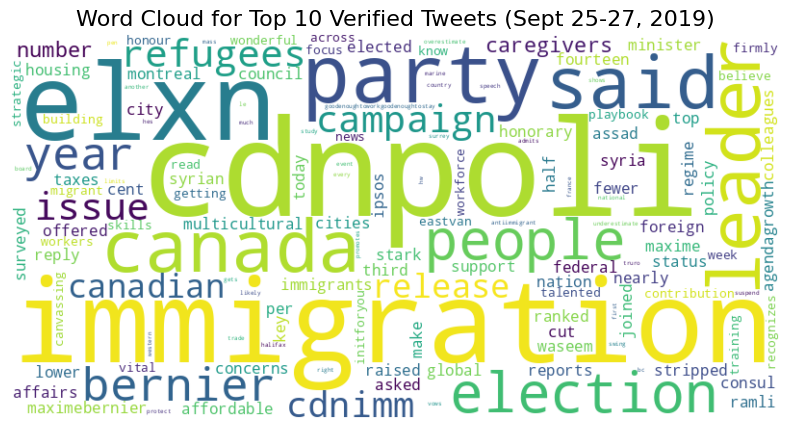

In [77]:
## word cloud for sept 25 to 27
# Combine all text from the top 10 tweets into a single string
all_text = " ".join(top_spike_tweets['clean_text'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title("Word Cloud for Top 10 Verified Tweets (Sept 25-27, 2019)", fontsize=16)
plt.show()


**Scenario 2**

- After reviewing election of 2019, political parties conduct their political campaign on September
- it means that verified accounts(mostly) will conduct tweets about their POV and Lobbying on September
- If we were right, we could see the impacts on October's tweet

In [78]:
# Ensure that 'df_no_bots' is available and contains the necessary columns
september_tweets = df_no_bots[(df_no_bots['created_at'] >= '2019-09-01') & (df_no_bots['created_at'] <= '2019-09-30')]
october_tweets = df_no_bots[(df_no_bots['created_at'] >= '2019-10-01') & (df_no_bots['created_at'] <= '2019-10-31')]

september_verified = september_tweets[september_tweets['user.verified'] == True]
september_non_verified = september_tweets[september_tweets['user.verified'] == False]



In [79]:
from collections import Counter
from textblob import TextBlob

# Combine text from verified users
all_verified_text_september = " ".join(september_verified['clean_text'])
verified_word_counts = Counter(all_verified_text_september.split())
top_verified_words_september = verified_word_counts.most_common(10)

# Sentiment analysis for verified users
september_verified['sentiment'] = september_verified['clean_text'].apply(
    lambda text: TextBlob(text).sentiment.polarity
)

positive_tweets_count = len(september_verified[september_verified['sentiment'] > 0])
negative_tweets_count = len(september_verified[september_verified['sentiment'] < 0])
neutral_tweets_count = len(september_verified[(september_verified['sentiment'] == 0)])

C:\Users\sutri\AppData\Local\Temp\ipykernel_33492\2130832212.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  september_verified['sentiment'] = september_verified['clean_text'].apply(


In [80]:
# Sentiment-Engagement Correlation in October
october_tweets['sentiment'] = october_tweets['clean_text'].apply(
    lambda text: TextBlob(text).sentiment.polarity
)
correlation_october = october_tweets[['sentiment', 'reactions']].corr().iloc[0, 1]

results = {
    "September Verified Engagement": {
        "Top Words": top_verified_words_september,
        "Positive Tweets": positive_tweets_count,
        "Negative Tweets": negative_tweets_count,
        "Neutral Tweets": neutral_tweets_count,
    },
    "October Sentiment-Engagement Correlation": correlation_october,
}

print(results)


{'September Verified Engagement': {'Top Words': [('cdnpoli', 190), ('elxn', 158), ('immigration', 114), ('canada', 51), ('refugees', 49), ('cdnimm', 47), ('de', 45), ('les', 38), ('says', 36), ('la', 34)], 'Positive Tweets': 126, 'Negative Tweets': 42, 'Neutral Tweets': 99}, 'October Sentiment-Engagement Correlation': -0.029891939937817396}


C:\Users\sutri\AppData\Local\Temp\ipykernel_33492\1723340150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  october_tweets['sentiment'] = october_tweets['clean_text'].apply(


In [81]:
# Recreate the dataset
# Assume df is the full dataset
df['reactions'] = df['retweet_count'] + df['favorite_count']
df_no_bots = df[df['actor_type'] != 'Bot']

# Filter October tweets
october_tweets = df_no_bots[(df_no_bots['created_at'] >= '2019-10-01') & (df_no_bots['created_at'] <= '2019-10-31')]

# Sentiment analysis
october_tweets['sentiment'] = october_tweets['clean_text'].apply(
    lambda text: TextBlob(text).sentiment.polarity
)

# Categorize sentiment
october_tweets['sentiment_category'] = october_tweets['sentiment'].apply(
    lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral')
)

# Reactions by sentiment
reactions_by_sentiment = october_tweets.groupby('sentiment_category')['reactions'].mean()

# Sentiment-reactions correlation
correlation_october_sentiment_reactions = october_tweets[['sentiment', 'reactions']].corr().iloc[0, 1]

# Prepare results
results = {
    "Average Reactions by Sentiment": reactions_by_sentiment.to_dict(),
    "Sentiment-Reactions Correlation (October)": correlation_october_sentiment_reactions
}

# Display results
print("Results:")
print(results)


Results:
{'Average Reactions by Sentiment': {'Negative': 29.26086956521739, 'Neutral': 8.307692307692308, 'Positive': 26.06153846153846}, 'Sentiment-Reactions Correlation (October)': -0.029891939937817396}


C:\Users\sutri\AppData\Local\Temp\ipykernel_33492\1147646358.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  october_tweets['sentiment'] = october_tweets['clean_text'].apply(
C:\Users\sutri\AppData\Local\Temp\ipykernel_33492\1147646358.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  october_tweets['sentiment_category'] = october_tweets['sentiment'].apply(


C:\Users\sutri\AppData\Local\Temp\ipykernel_33492\2624714814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_bots['created_at'] = pd.to_datetime(df_no_bots['created_at'])


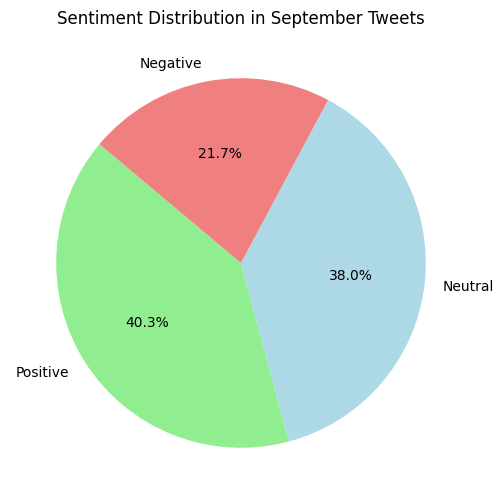

In [88]:

# Ensure 'created_at' is datetime
df_no_bots['created_at'] = pd.to_datetime(df_no_bots['created_at'])

# Filter September tweets
september_tweets = df_no_bots[(df_no_bots['created_at'] >= pd.Timestamp('2019-09-01', tz='UTC')) &
                              (df_no_bots['created_at'] <= pd.Timestamp('2019-09-30', tz='UTC'))].copy()

# Sentiment analysis
september_tweets['sentiment'] = september_tweets['clean_text'].apply(
    lambda text: TextBlob(text).sentiment.polarity
)

# Categorize sentiment
september_tweets['sentiment_category'] = september_tweets['sentiment'].apply(
    lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral')
)

# Define the correct color mapping for sentiment categories
sentiment_distribution_september = september_tweets['sentiment_category'].value_counts()
color_mapping_september = {
    'Negative': 'lightcoral',  # Light red for Negative
    'Neutral': 'lightblue',    # Light blue for Neutral
    'Positive': 'lightgreen'   # Light green for Positive
}

# Get the colors for the sentiment categories in the order of the distribution
colors_september = [color_mapping_september[category] for category in sentiment_distribution_september.index]

# Plot pie chart for September
plt.figure(figsize=(8, 6))
plt.pie(sentiment_distribution_september, labels=sentiment_distribution_september.index, autopct='%1.1f%%', startangle=140, colors=colors_september)
plt.title("Sentiment Distribution in September Tweets")
plt.show()


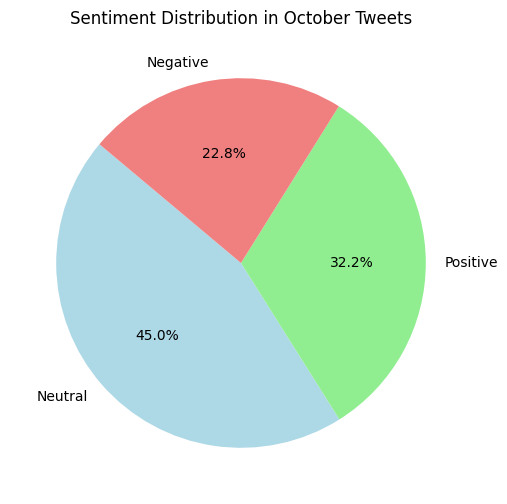

In [89]:
# Define the correct color mapping for sentiment categories
sentiment_distribution = october_tweets['sentiment_category'].value_counts()
color_mapping = {
    'Negative': 'lightcoral',  # Light red for Negative
    'Neutral': 'lightblue',    # Light blue for Neutral
    'Positive': 'lightgreen'   # Light green for Positive
}

# Categorize sentiment
october_tweets['sentiment_category'] = october_tweets['sentiment'].apply(
    lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral')
)

# Get the colors for the sentiment categories in the order of the distribution
colors = [color_mapping[category] for category in sentiment_distribution.index]

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Sentiment Distribution in October Tweets")
plt.show()


Sentiment analysis for most retweet and liked for Both Verified and Non-Verified users

In [85]:
# Adjust to ensure text alignnments

pd.set_option('display.max_colwidth', None)  ## set up to Prevent truncation of text
pd.set_option('display.colheader_justify', 'left')  # Align column headers to the left

# Apply the cleaning function to the full_text column
df_no_bots['clean_text'] = df_no_bots['full_text'].apply(clean_text)

# Find the most retweeted tweets with verification status
most_retweeted_clean = df_no_bots[['clean_text', 'retweet_count', 'user.verified']].sort_values(by='retweet_count', ascending=False).head(5)

# Find the most liked tweets with verification status
most_liked_clean = df_no_bots[['clean_text', 'favorite_count', 'user.verified']].sort_values(by='favorite_count', ascending=False).head(5)

# Display the cleaned results
print("Most Retweeted Tweets with Verification or non-verified Status (Cleaned):")
print(most_retweeted_clean)

print("\nMost Liked Tweets with Verification or non-verified Status (Cleaned):")
print(most_liked_clean)



Most Retweeted Tweets with Verification or non-verified Status (Cleaned):
     clean_text                                                                                                                                                                                                                                                           \
1032                                                                                                                                                                            new from me immigration lawyers report canadian muslims being denied entry to us cdnpoli   
438                                                                                                                                      andrew scheer just said refugees are jumping the line thats false its been factchecked many times heres one by firstdebate elxn   
2370                                                 remember when told a heckler her racism has no place in canada the wo

C:\Users\sutri\AppData\Local\Temp\ipykernel_33492\2742062406.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_bots['clean_text'] = df_no_bots['full_text'].apply(clean_text)


Network Analysis

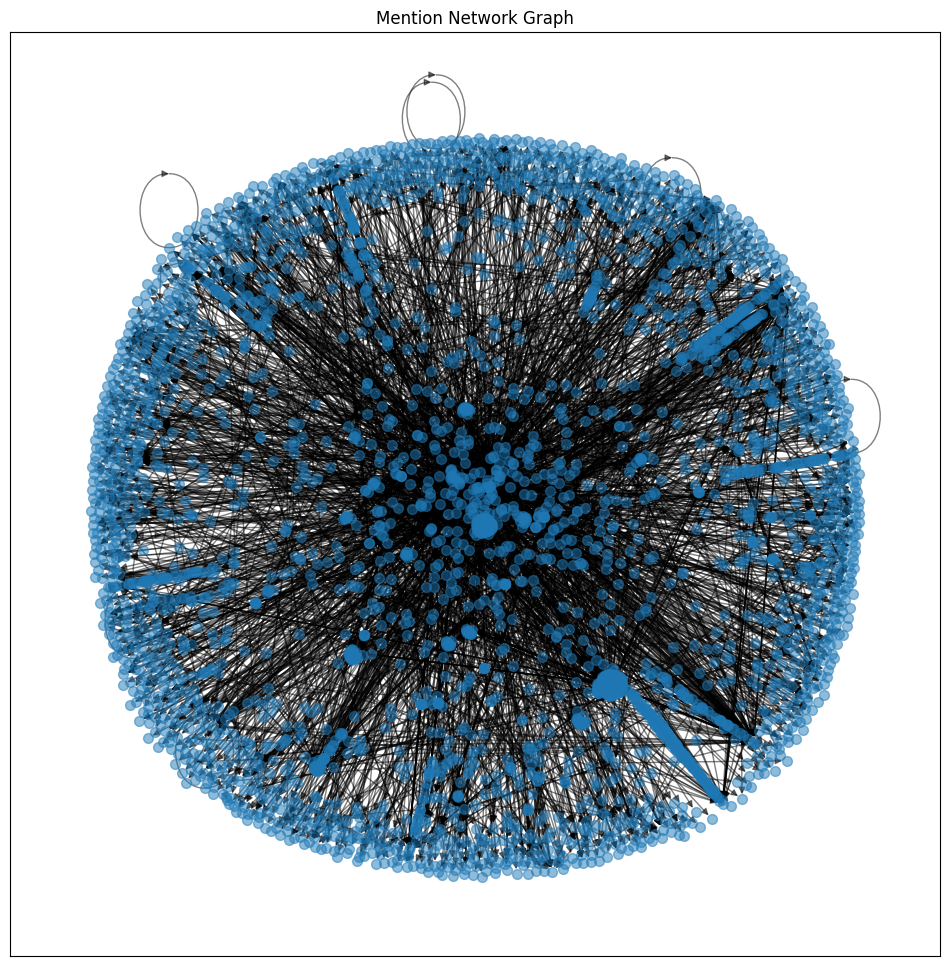

In [ ]:
## import necessary library for network
import networkx as nx
import re

# Extract mention edges
def extract_mentions(text):
    mentions = re.findall(r'@(\w+)', text)
    return mentions

edges = []
for _, row in df_no_bots.iterrows():
    mentions = extract_mentions(row['full_text'])
    for mention in mentions:
        edges.append((row['user.screen_name'], mention))

## directed graph
G = nx.DiGraph()
G.add_edges_from(edges)

## Plot the network graph
plt.figure(figsize=(12, 12))
nx.draw_networkx(G, with_labels=False, node_size=50, alpha=0.5)
plt.title('Mention Network Graph')
plt.show()

### Self explain
## Blue circle represents a Twitter user, Larger clusters or denser areas of nodes suggest users or groups that are more actively mentioning or being mentioned.
## The black lines are edges connecting nodes. They represent a mention in a tweet (e.g., User A mentioned User B).
## Key insights from the plot, Large clusters or denser areas often indicate influential users being frequently mentioned (e.g., politicians, journalists).
## Isolated or sparsely connected areas represent users who are less engaged in the central conversation or community.
## Dense Areas: These represent sub-communities or groups of users actively mentioning each other, possibly sharing similar views or participating in a shared conversation.


In [ ]:
# Recreate the mention network graph
def extract_mentions(text):
    mentions = re.findall(r'@(\w+)', text)
    return mentions

edges = []
for _, row in df_no_bots.iterrows():
    mentions = extract_mentions(row['full_text'])
    for mention in mentions:
        edges.append((row['user.screen_name'], mention))

# Create a directed graph
G = nx.DiGraph()
G.add_edges_from(edges)

# Calculate centrality metrics
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Identify top users by degree centrality
top_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Detect communities using modularity-based clustering
from networkx.algorithms.community import greedy_modularity_communities
communities = list(greedy_modularity_communities(G))

# Prepare summaries
top_users_table = pd.DataFrame(top_degree_centrality, columns=['User', 'Degree Centrality'])
community_sizes = [len(community) for community in communities]
community_sizes_summary = pd.DataFrame(community_sizes, columns=['Community Size'])

# Display results
print("Top Users by Degree Centrality:")
print(top_users_table)

print("\nCommunity Sizes:")
print(community_sizes_summary)

Top Users by Degree Centrality:
  User              Degree Centrality
0        sunlorrie  0.061236         
1      maritstiles  0.060142         
2    JustinTrudeau  0.048387         
3     AndrewScheer  0.040733         
4       SaveRHomes  0.032531         
5     VictorY_Wong  0.032258         
6    MaximeBernier  0.030071         
7  MigrantRightsCA  0.027064         
8     ElizabethMay  0.023783         
9         macleans  0.021323         

Community Sizes:
     Community Size
0    351           
1    285           
2    268           
3    258           
4    220           
..              ...
209    2           
210    2           
211    2           
212    1           
213    1           

[214 rows x 1 columns]


In [ ]:
### 3 identify the key inflencers
# Calculate in-degree centrality (users receiving the most mentions)

in_degree_centrality = nx.in_degree_centrality(G)
top_influencers = sorted(in_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top Influencers (Most Mentioned):")
print(top_influencers)


Top Influencers (Most Mentioned):
[('sunlorrie', 0.06041552761071624), ('maritstiles', 0.06014215418261345), ('JustinTrudeau', 0.04838709677419355), ('AndrewScheer', 0.04073264078731547), ('MaximeBernier', 0.029797703663203935), ('MigrantRightsCA', 0.024603608529250955), ('ElizabethMay', 0.023236741388737013), ('macleans', 0.021323127392017496), ('CPC_HQ', 0.017495899398578457), ('cdnpoli_memes', 0.01530891197375615)]


In [ ]:
## analyse the sub-communities
from networkx.algorithms.community import greedy_modularity_communities
communities = list(greedy_modularity_communities(G))
print(f"Number of Communities: {len(communities)}")


Number of Communities: 214


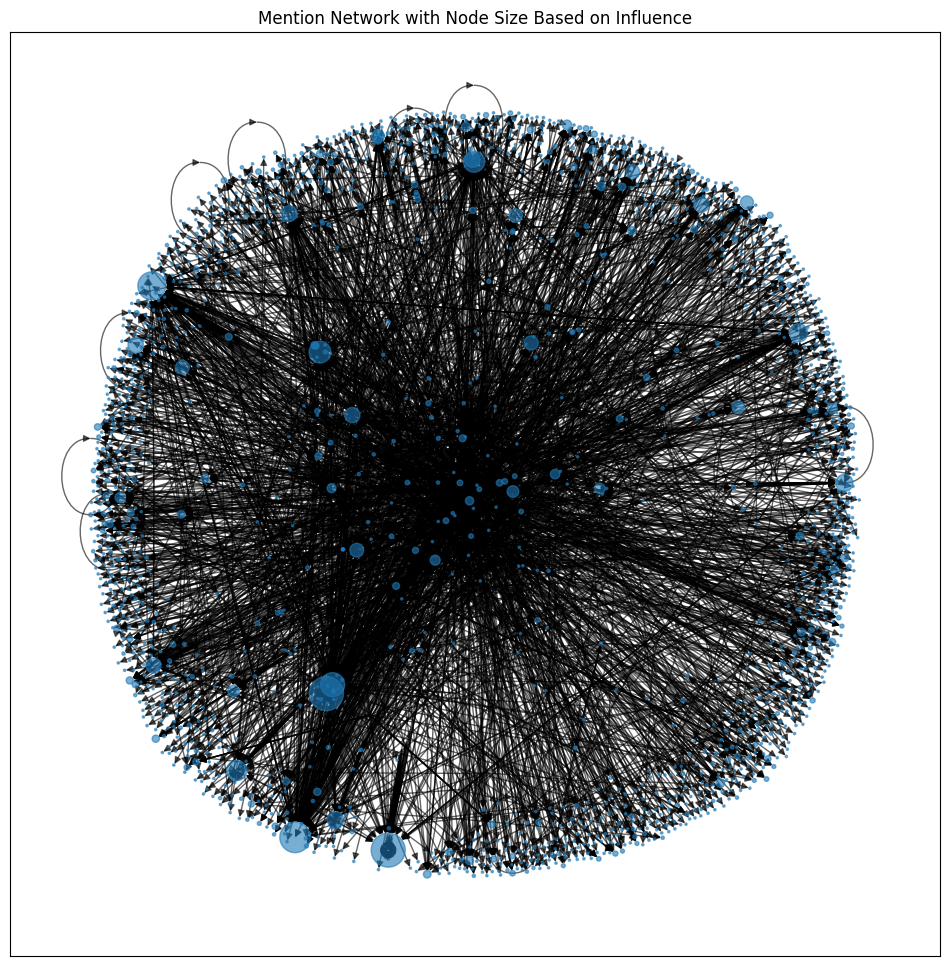

In [ ]:
## Visualize Key Users
# Scale node size based on in-degree centrality
node_size = [v * 10000 for v in in_degree_centrality.values()]

## plot the result
plt.figure(figsize=(12, 12))
nx.draw_networkx(G, with_labels=False, node_size=node_size, alpha=0.6)
plt.title('Mention Network with Node Size Based on Influence')
plt.show()
